# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pandas as pd

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    #location = 'E:\\Documents\\Dan\\Code\\Prospectus\\Document\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    location = 'C:\\Users\\Hendrickson\\Desktop\\Phone Acceleration\\3'

#Standard cycle for collors and line styles
#default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
#plt.rc('axes', prop_cycle=default_cycler)

In [2]:
#Extra Headers:
import DWFT as fp
import os as os
import pywt as py
import statistics as st
import os as os
import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
from pywt._extensions._pywt import (DiscreteContinuousWavelet, ContinuousWavelet,
                                Wavelet, _check_dtype)
from pywt._functions import integrate_wavelet, scale2frequency
from time import time as ti

my_cmap = plt.get_cmap('gray')

In [3]:
#DataSet = np.genfromtxt(open('./Data/Jeep SD 10.txt','r'), delimiter=',',skip_header=4)
#Header = np.array(['T', 'X1','Y1','Z1','X2','Y2','Z2'])
#Header = np.array(['Date','Hour','Min','Second','FracSec', 'X1','Y1','Z1','X2','Y2','Z2', 'X3','Y3','Z3','X4','Y4','Z4', 'X5','Y5','Z5','X6','Y6','Z6'])
Header = np.array(['s','t','x','y','z'])

fig=plt.figure(figsize=(6.67,3.75))
plt.plot(DataSet[:,0],DataSet[:,1], label = 'X')
plt.plot(DataSet[:,0],DataSet[:,2], label = 'Y')
plt.plot(DataSet[:,0],DataSet[:,3], label = 'Z')
plt.plot(DataSet[:,0],DataSet[:,4], label = 'R')

title = '4 Magnitude Acceleration Curves'
if Ledgends: plt.legend()
if Titles: plt.title(title)
if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
plt.show()

In [4]:
def PlotFingerPrint(data, xName='a', title='', FP='mexh',scales = 50, slices=10, trim=0):
    
    #FpScat=fp.getLabeledThumbprint(data, FP,scales,slices)
    print(np.shape(data)[1], scales)
    if xName == 'a':
        xName = np.arange(0,np.shape(data)[1]-2*trim,1)
    if trim == 0:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))
    else:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))

    

    fig1 = plt.figure(figsize=(6.67,3.75),dpi=600)
    ax1 = plt.axes()
    if trim == 0:
        cs1 = ax1.contourf(Al,Ms, data[:,:],cmap=my_cmap,levels=slices)
    else:
        cs1 = ax1.contourf(Al,Ms, data[:,trim:-trim],cmap=my_cmap,levels=slices)

    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    plt.show()

60kPoints-220303-1010-s3.csv (60000, 6)


<Figure size 5336x3000 with 0 Axes>

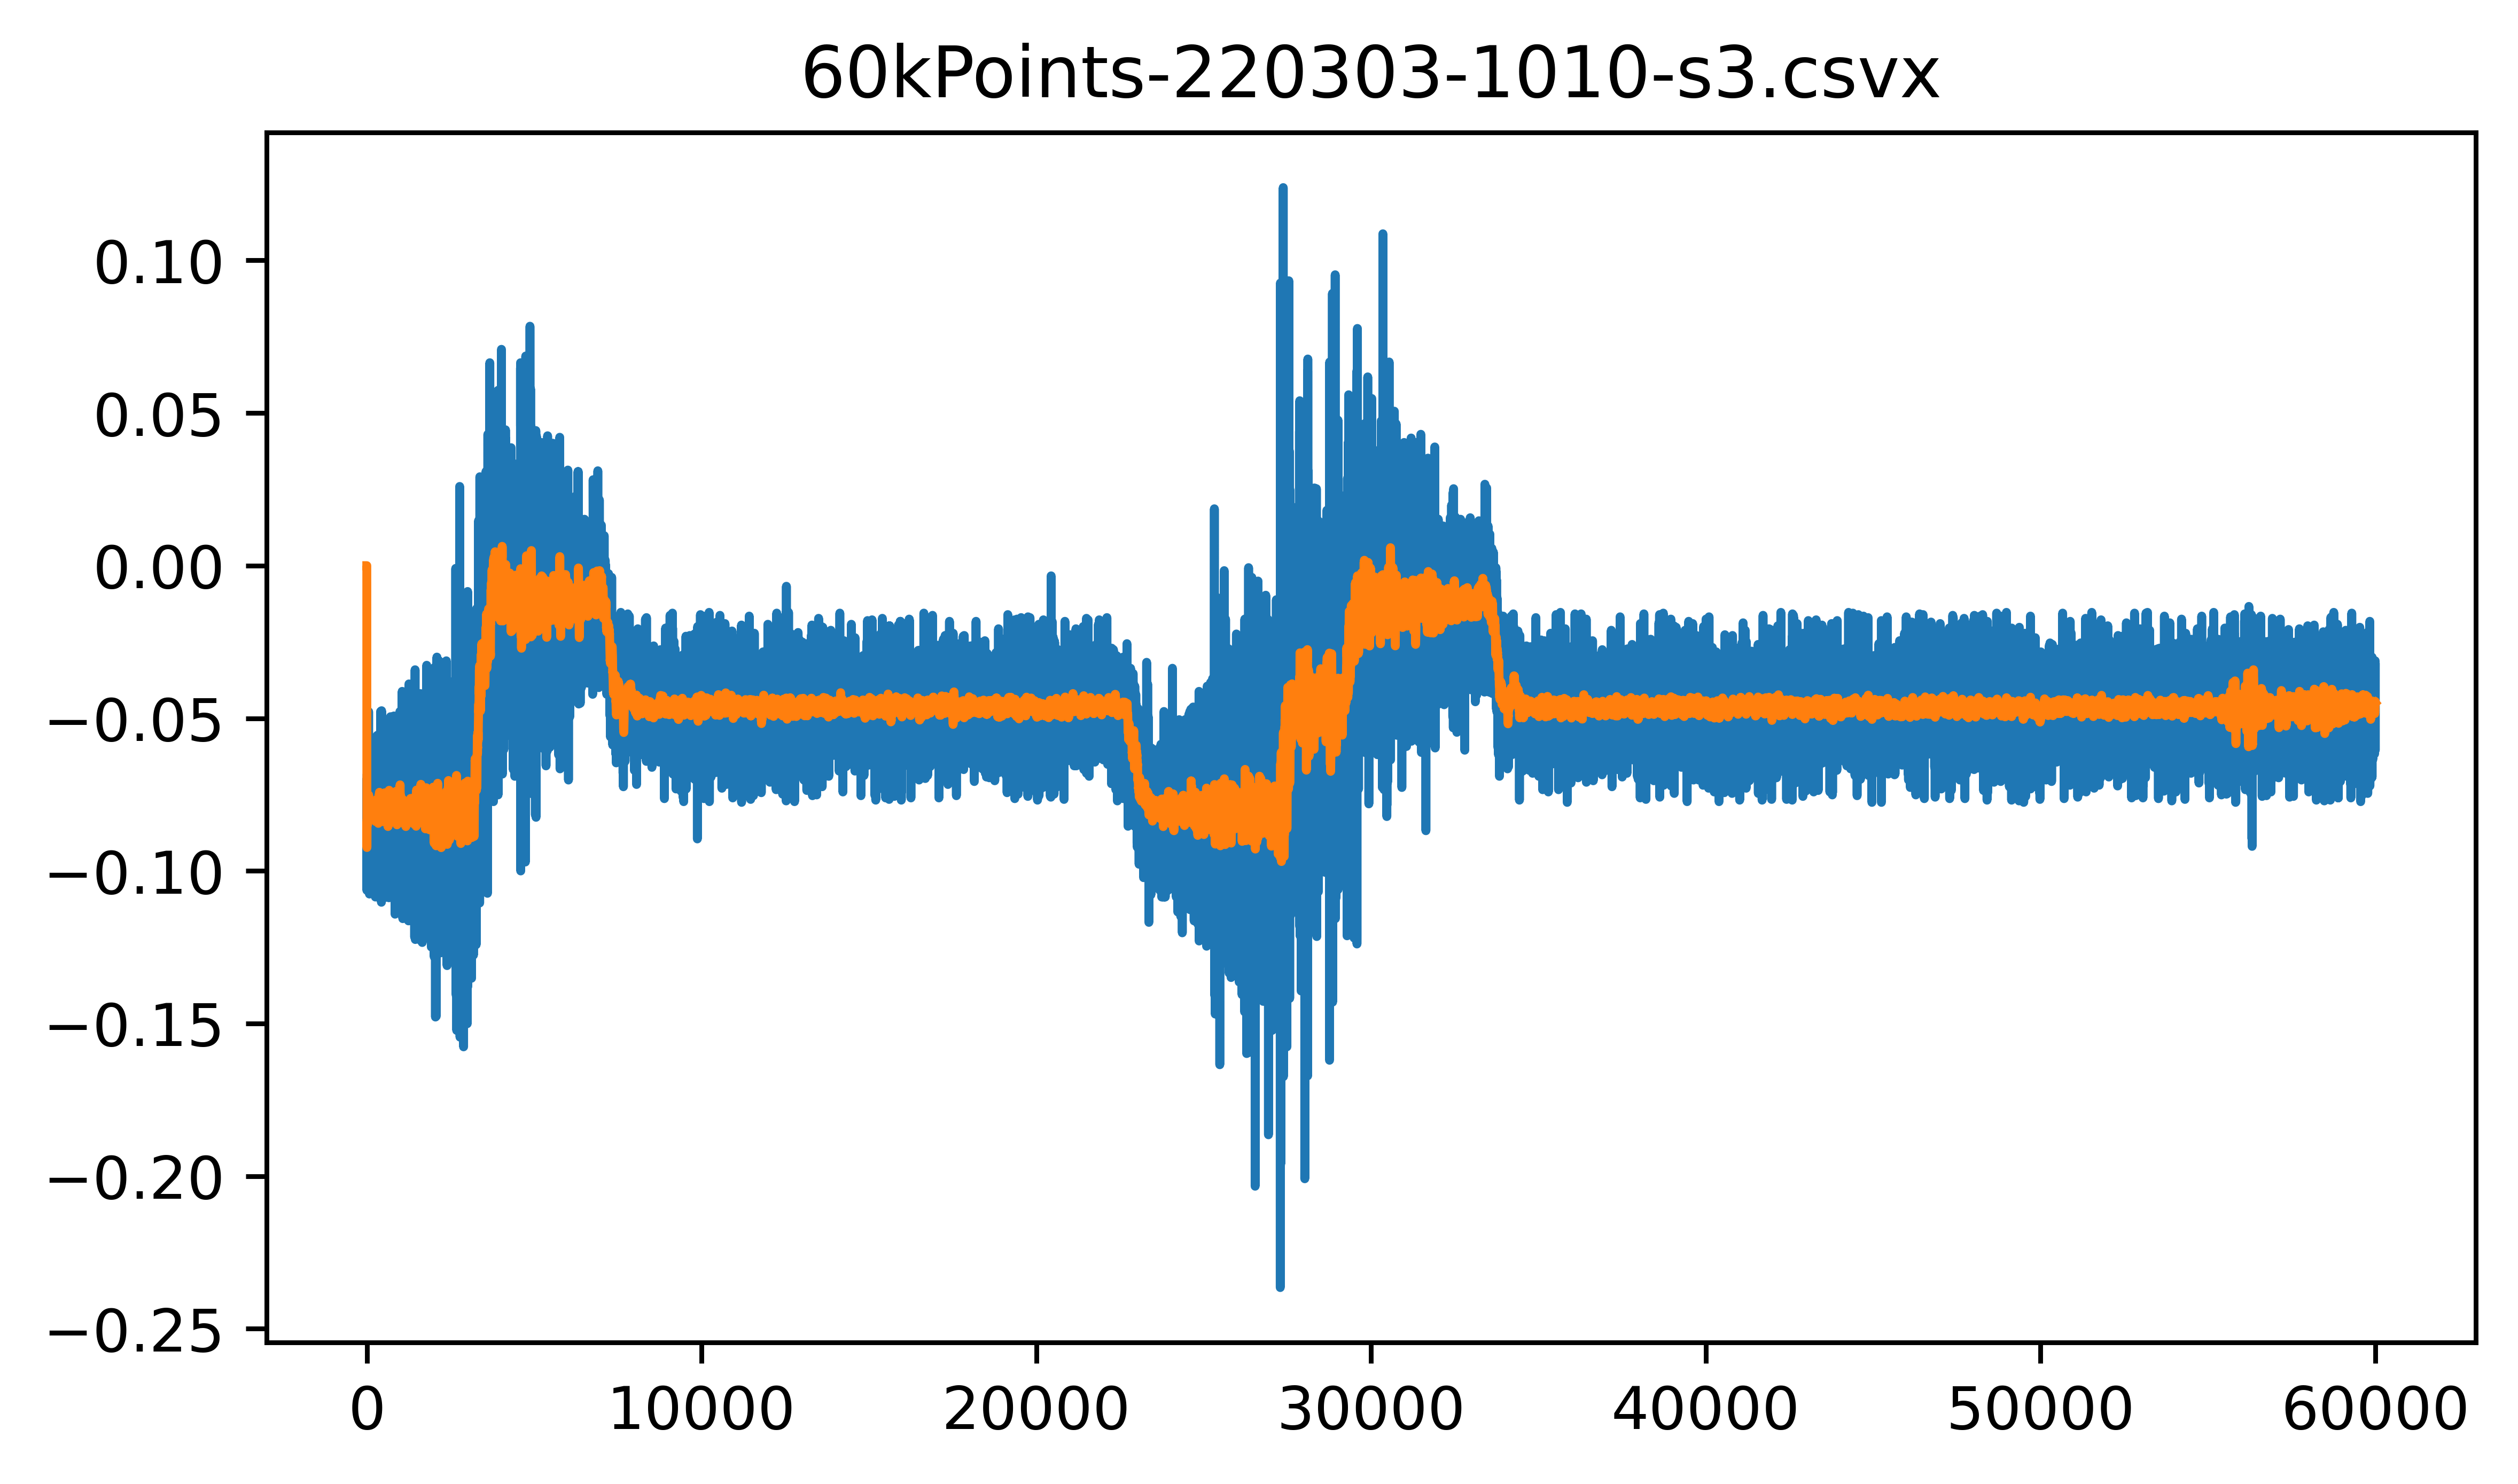

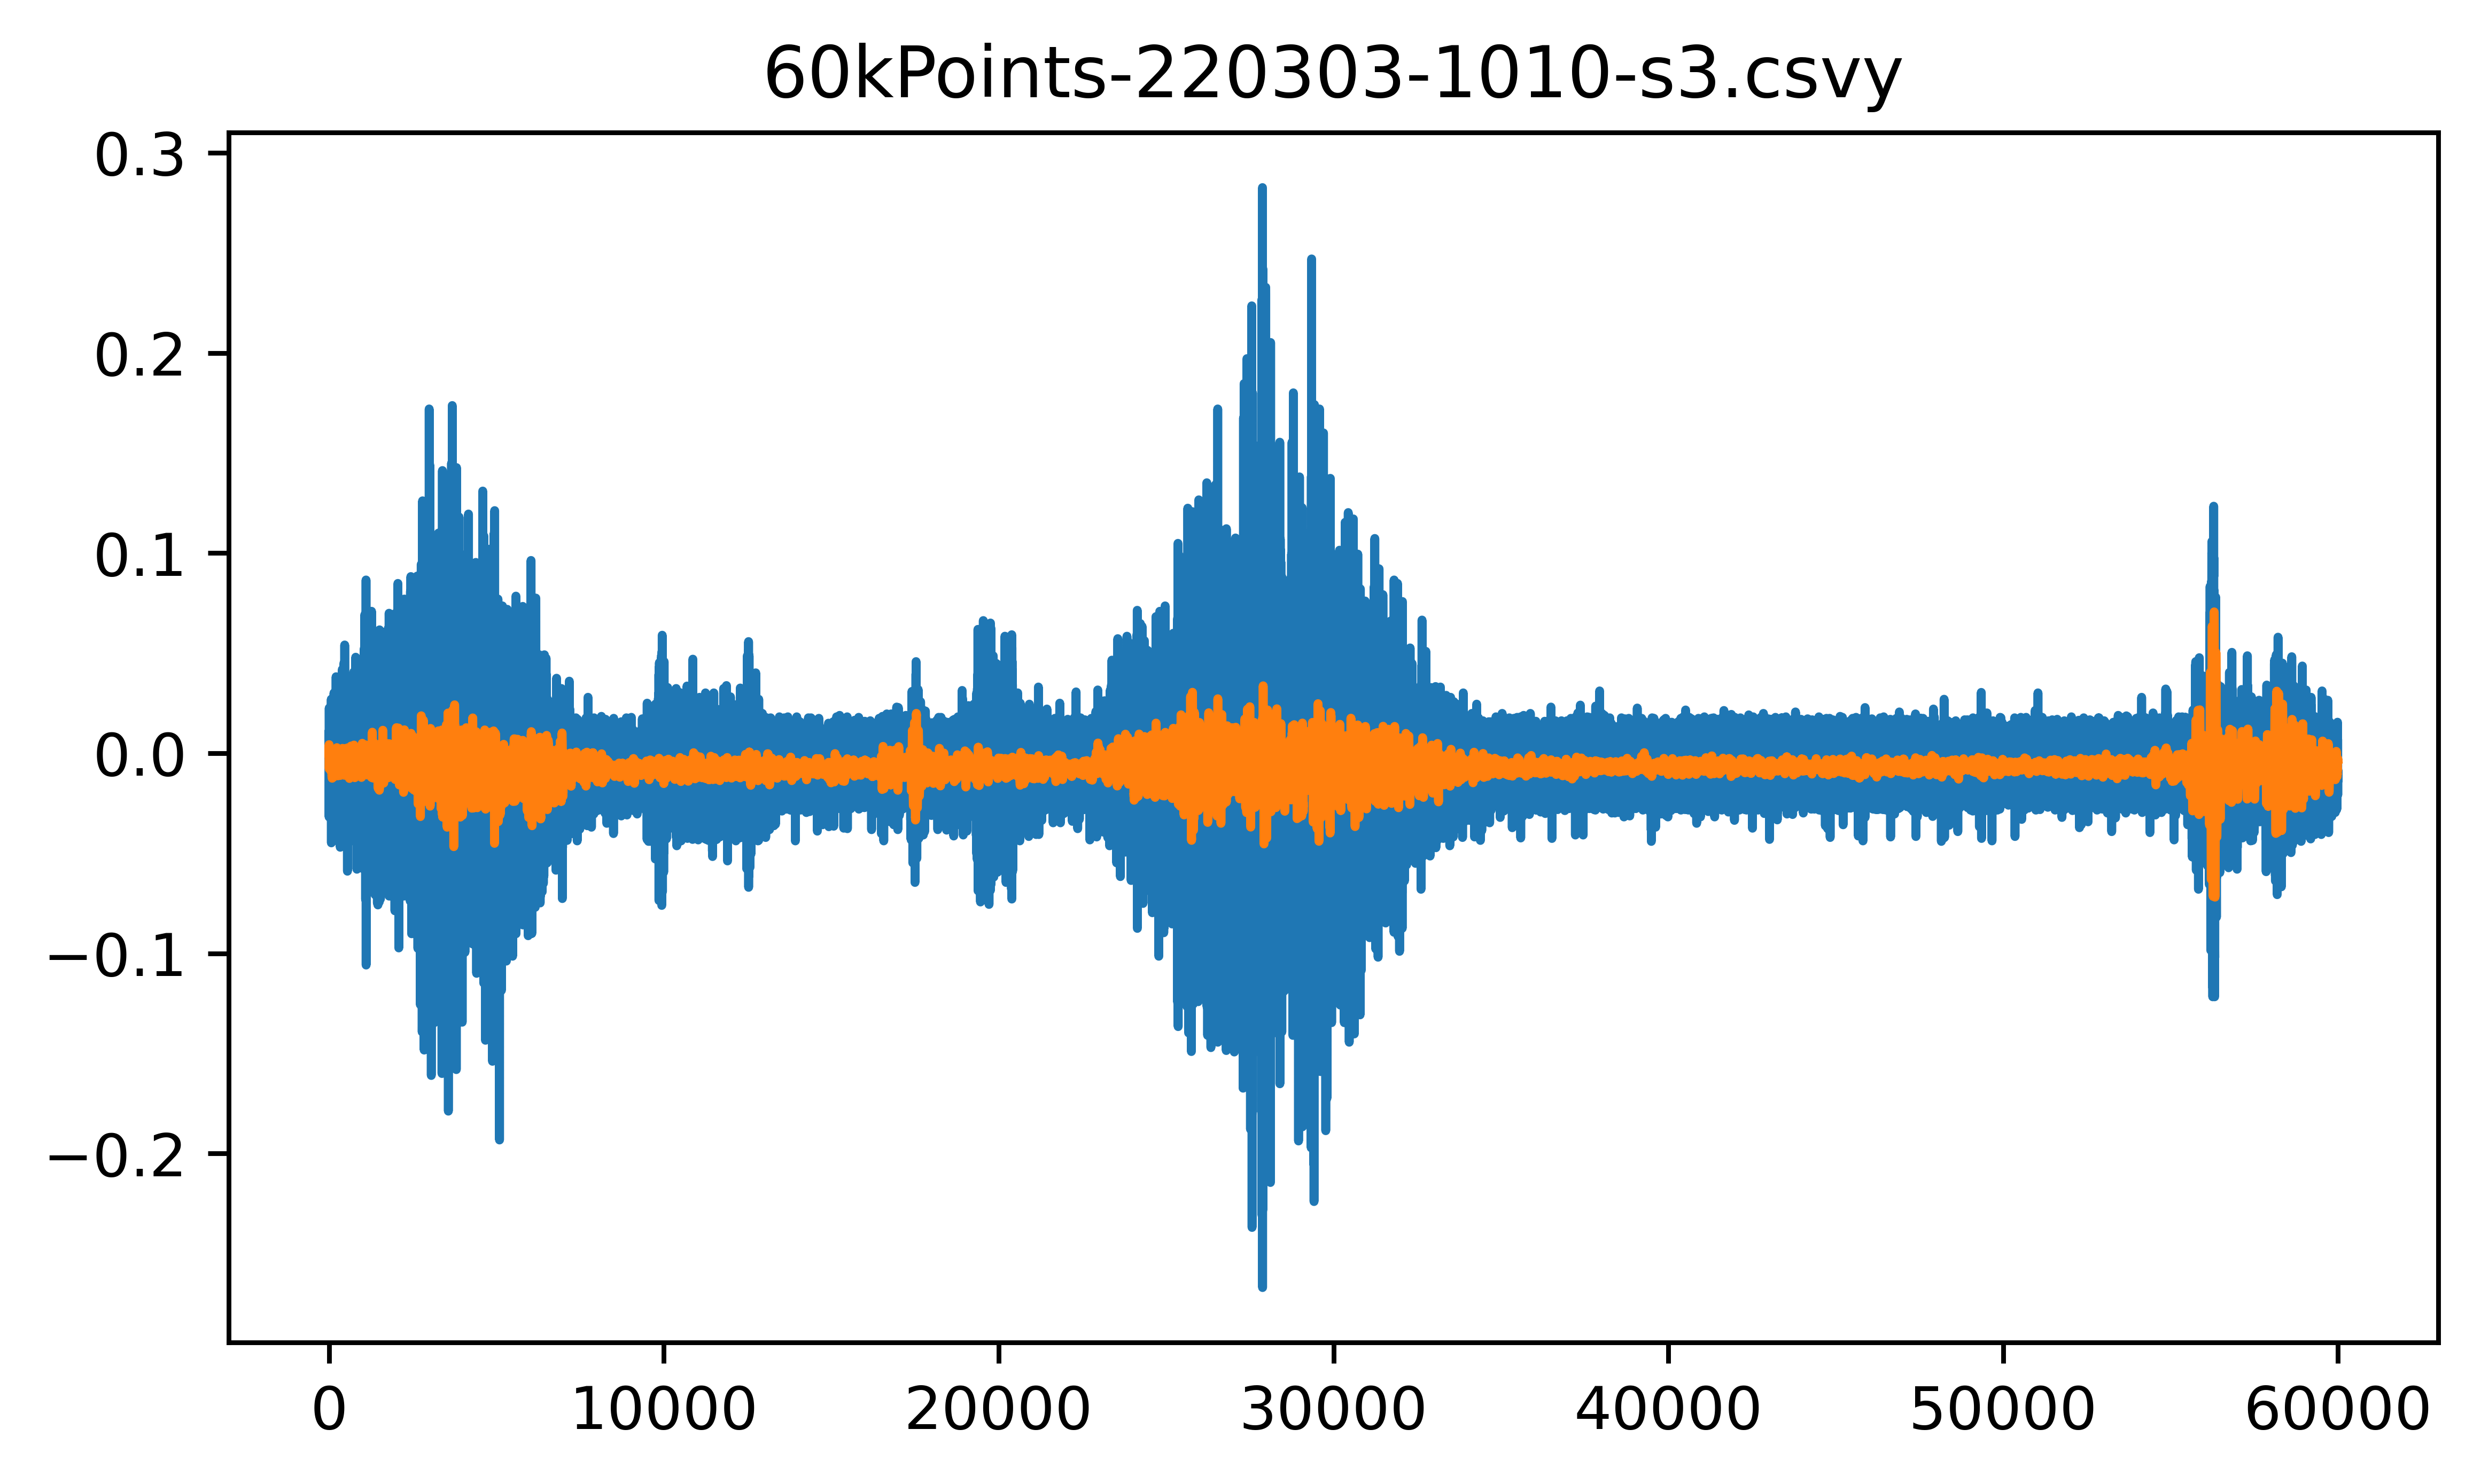

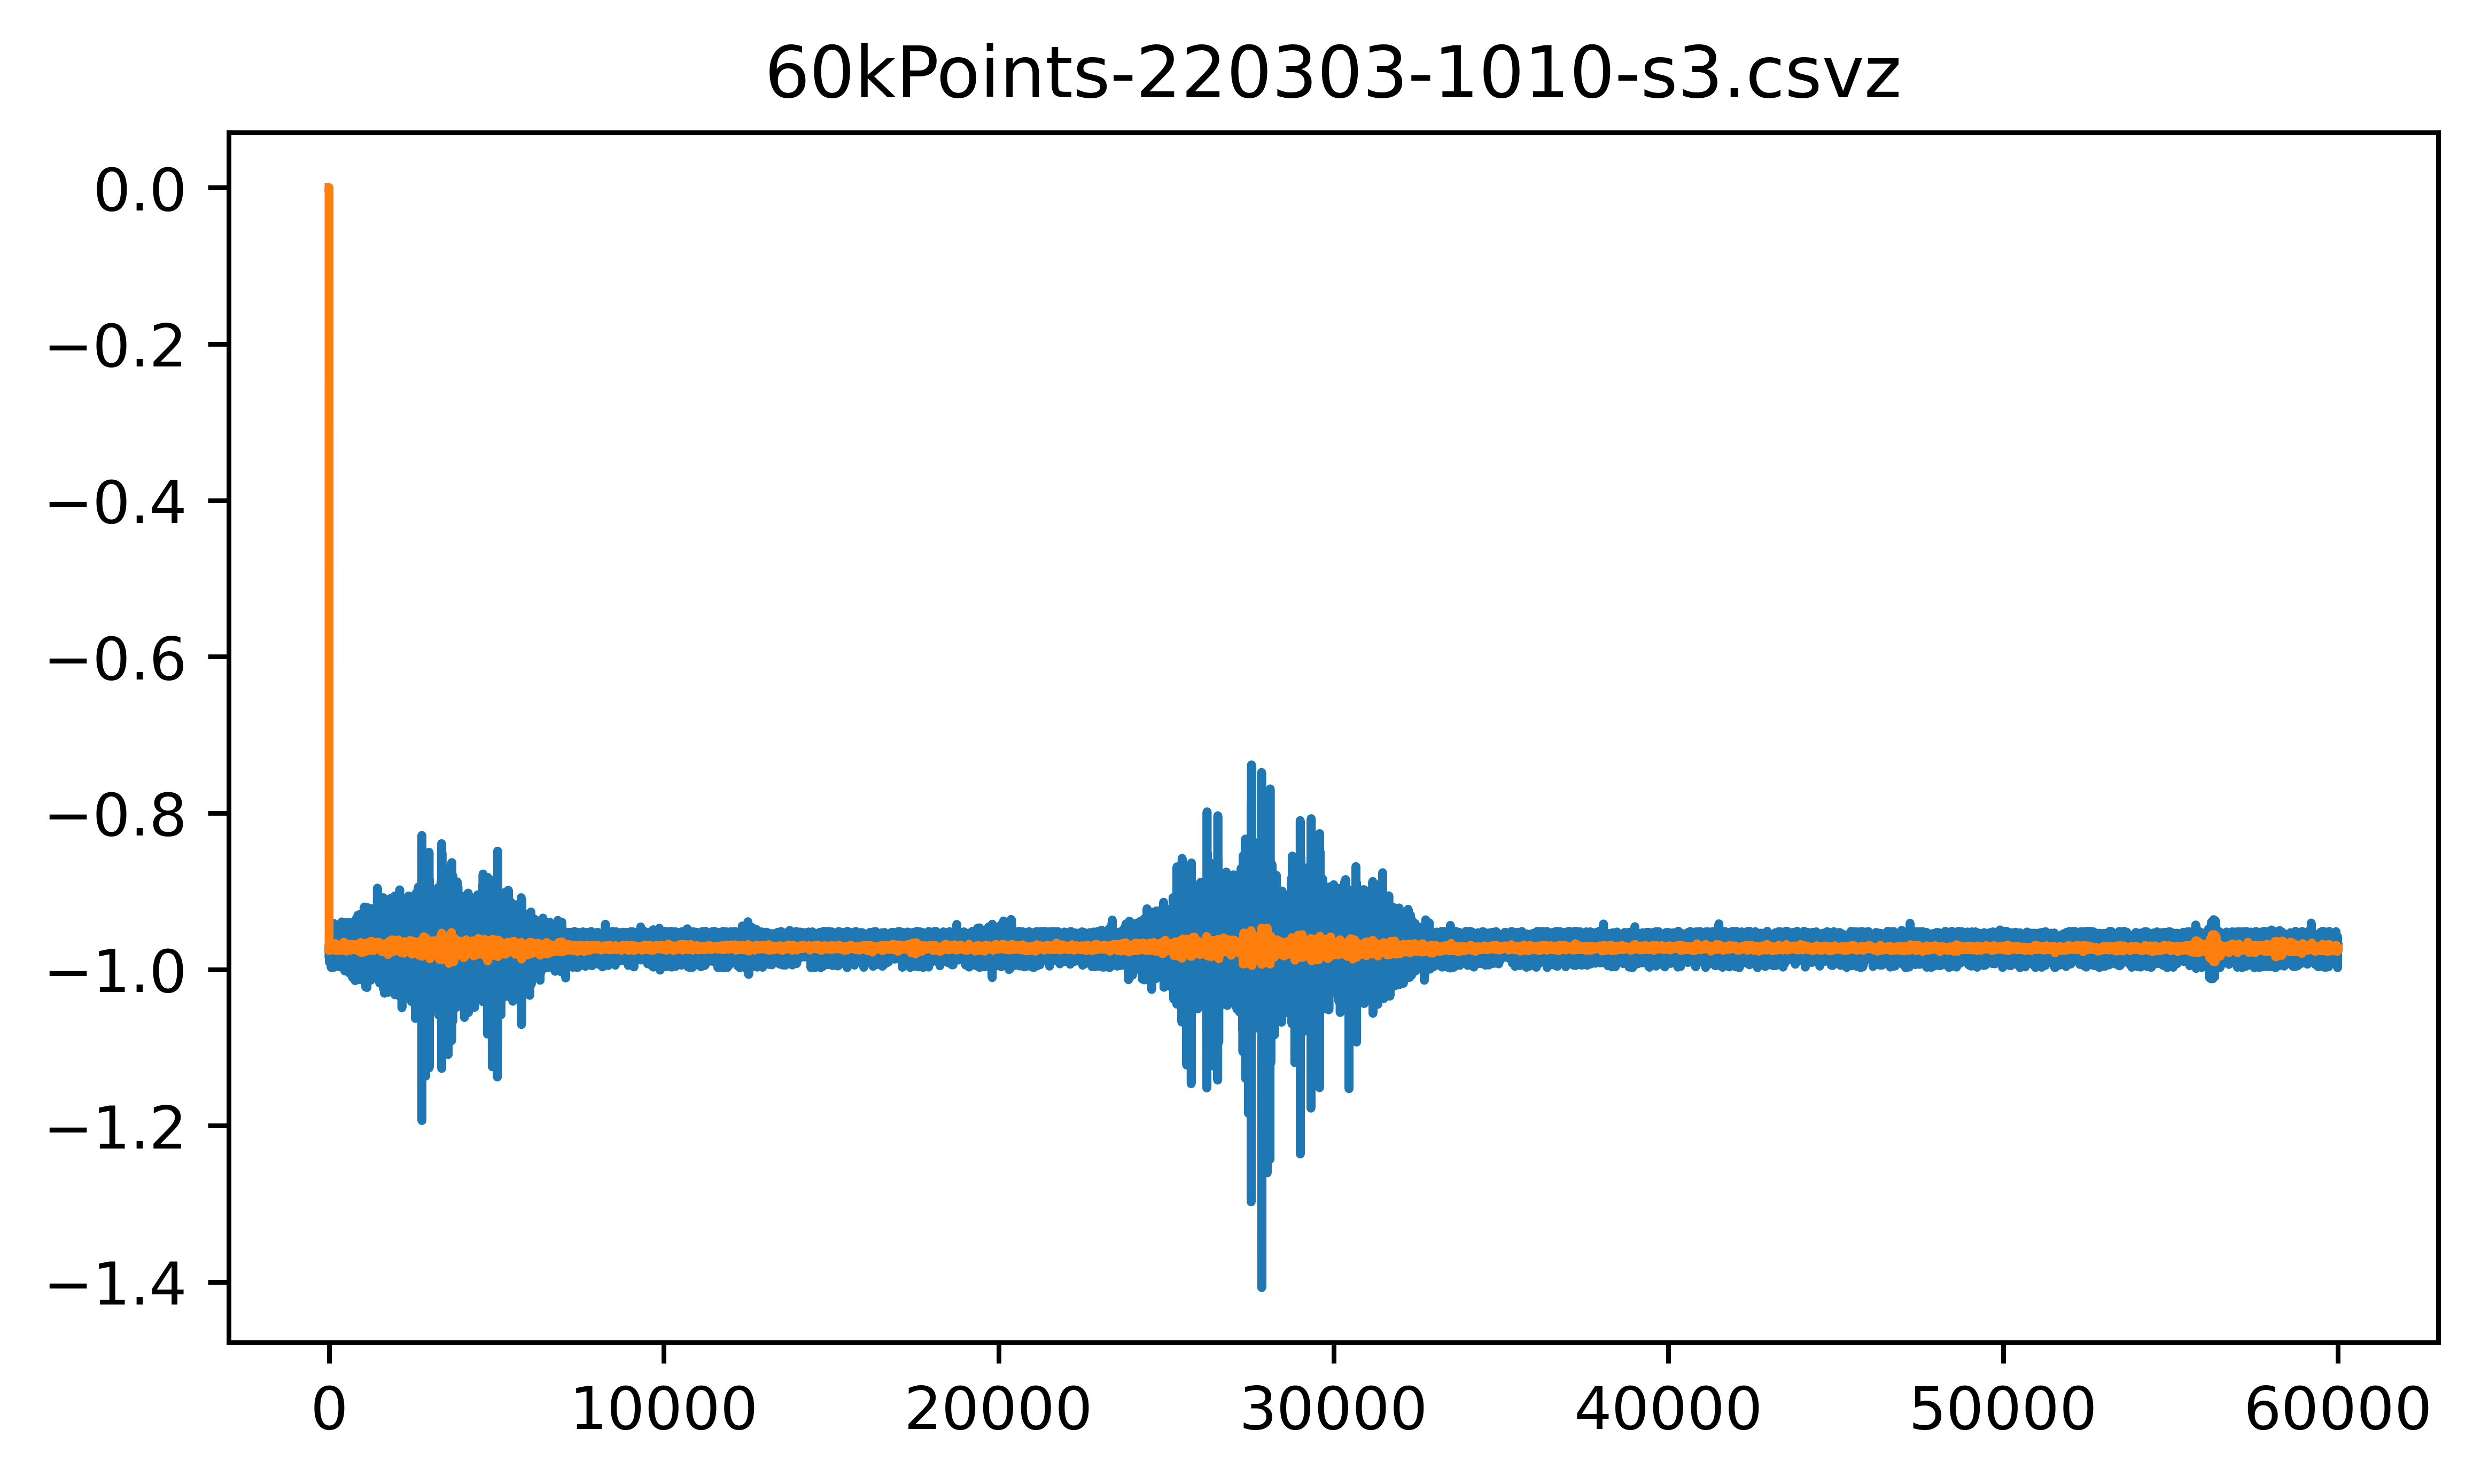

60kPoints-211217-1306-s4.csv (60000, 6)


<Figure size 5336x3000 with 0 Axes>

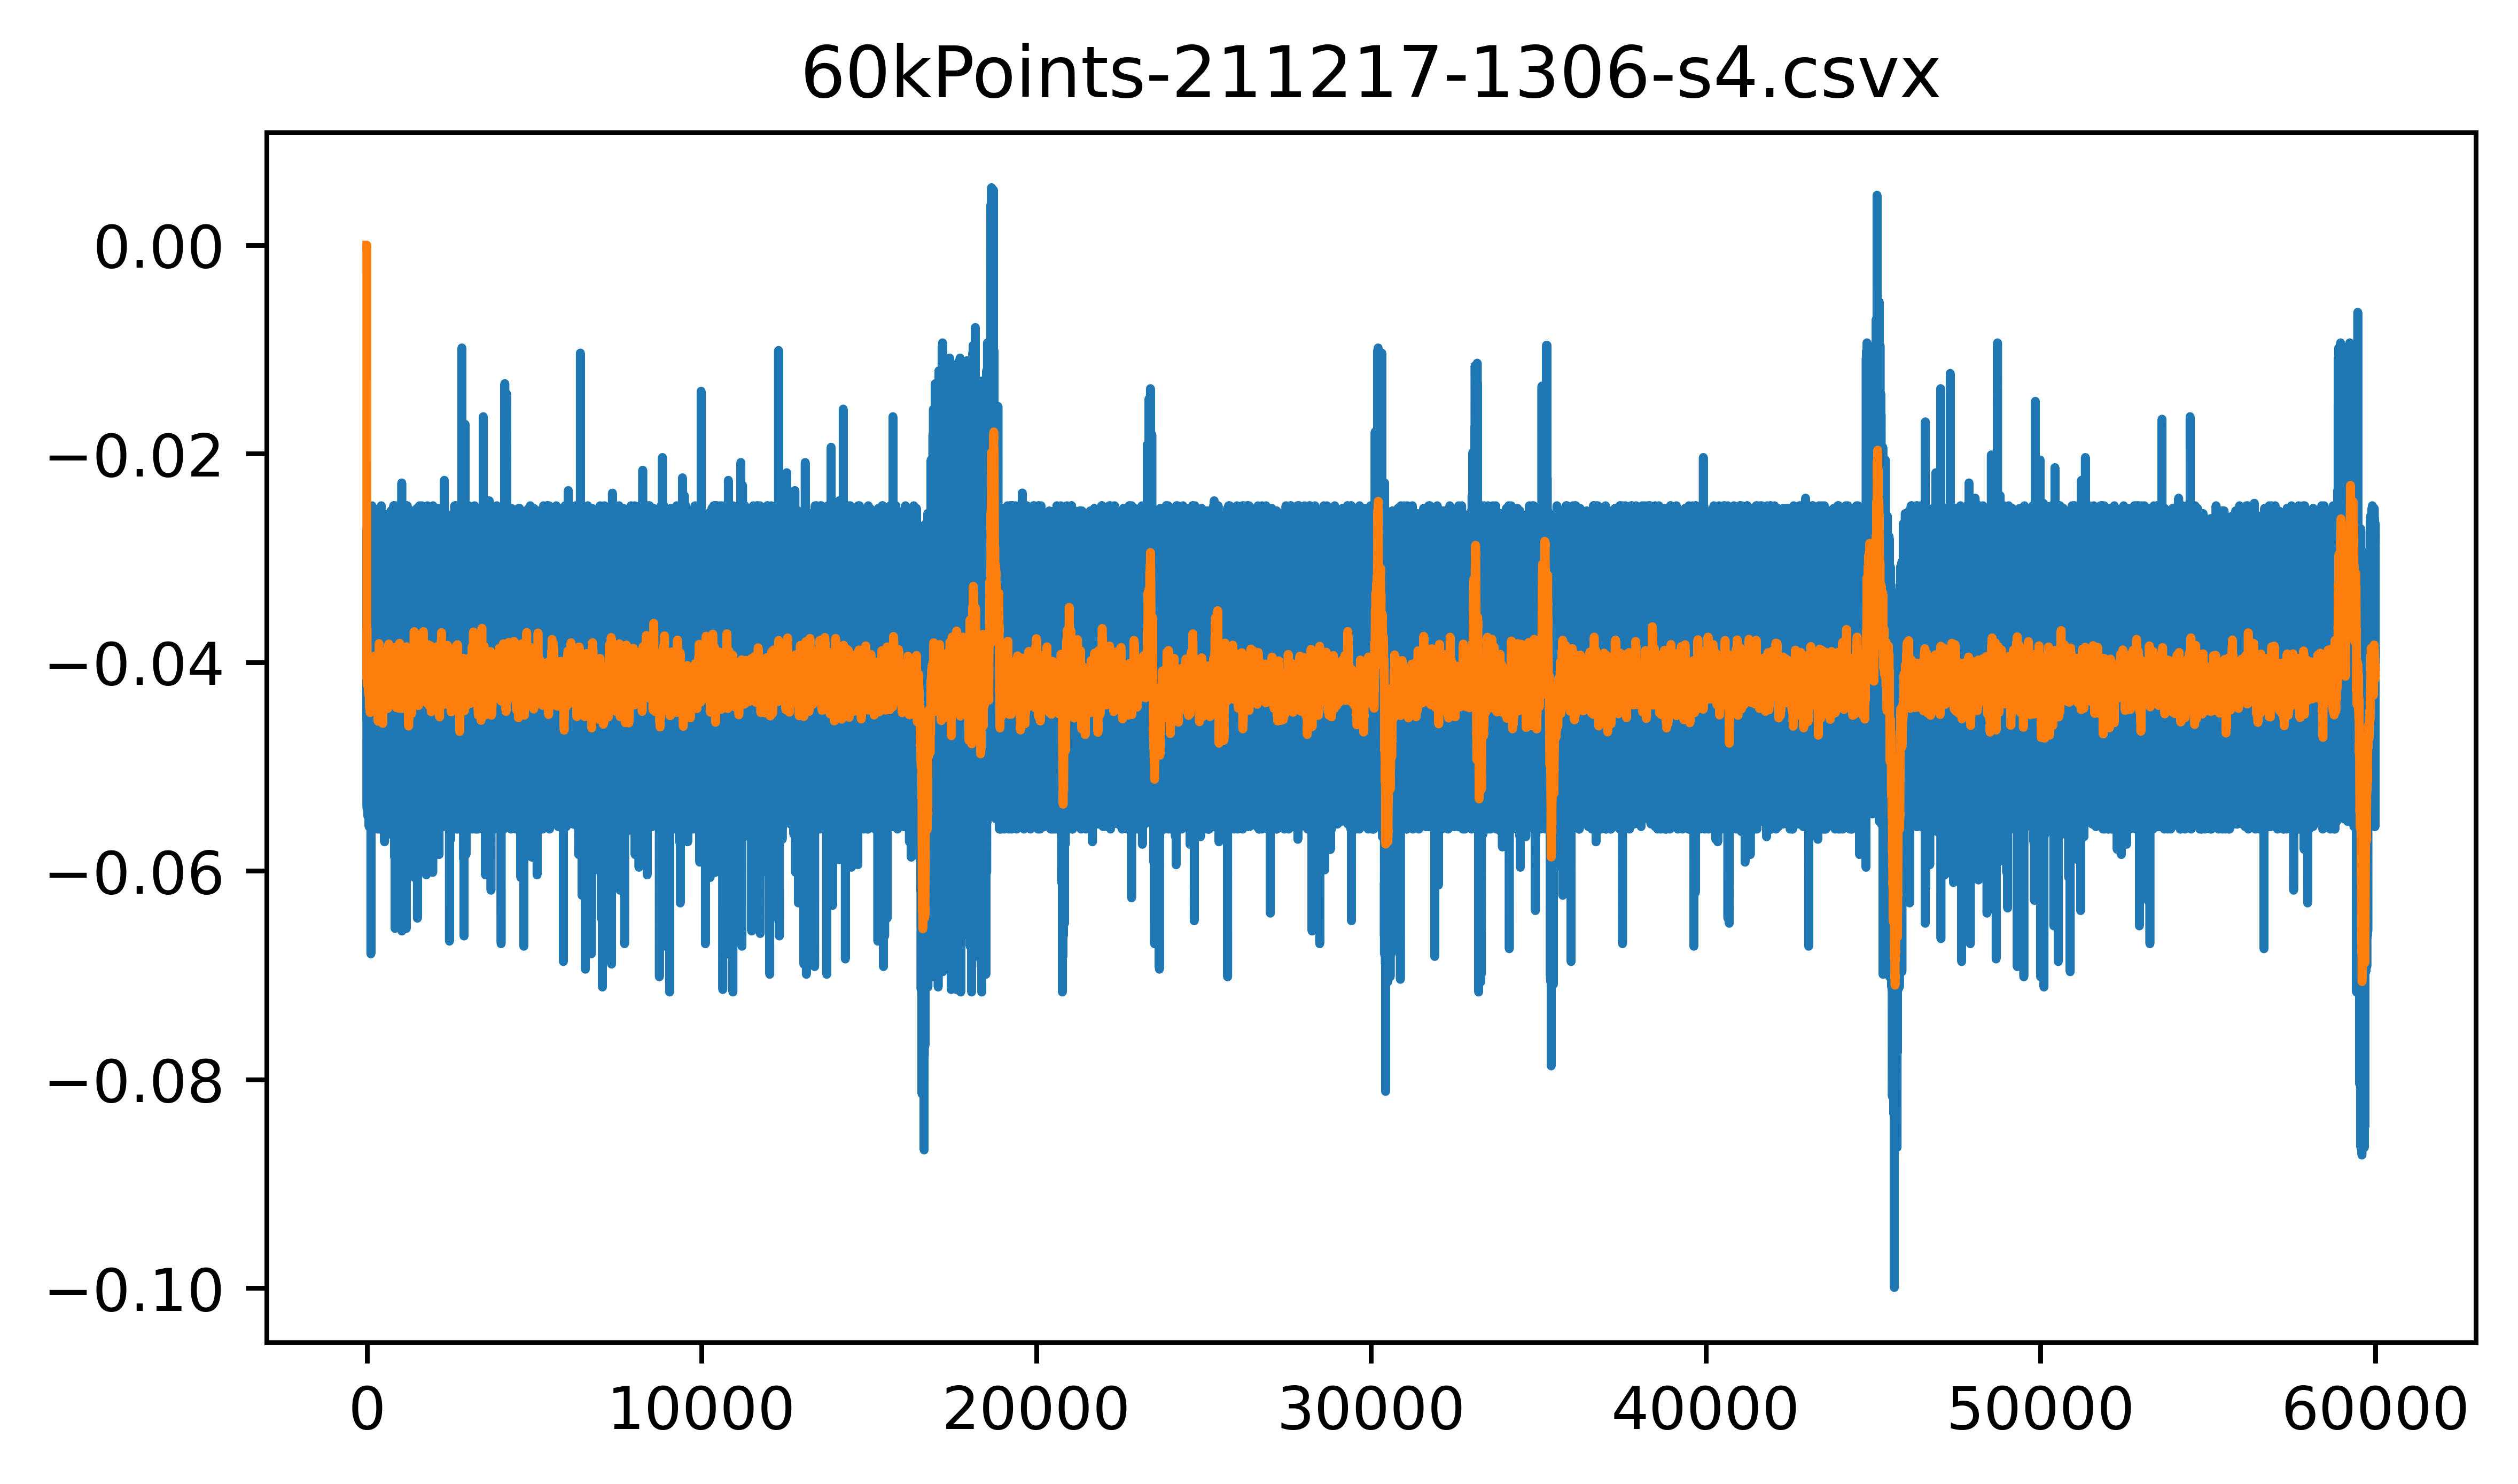

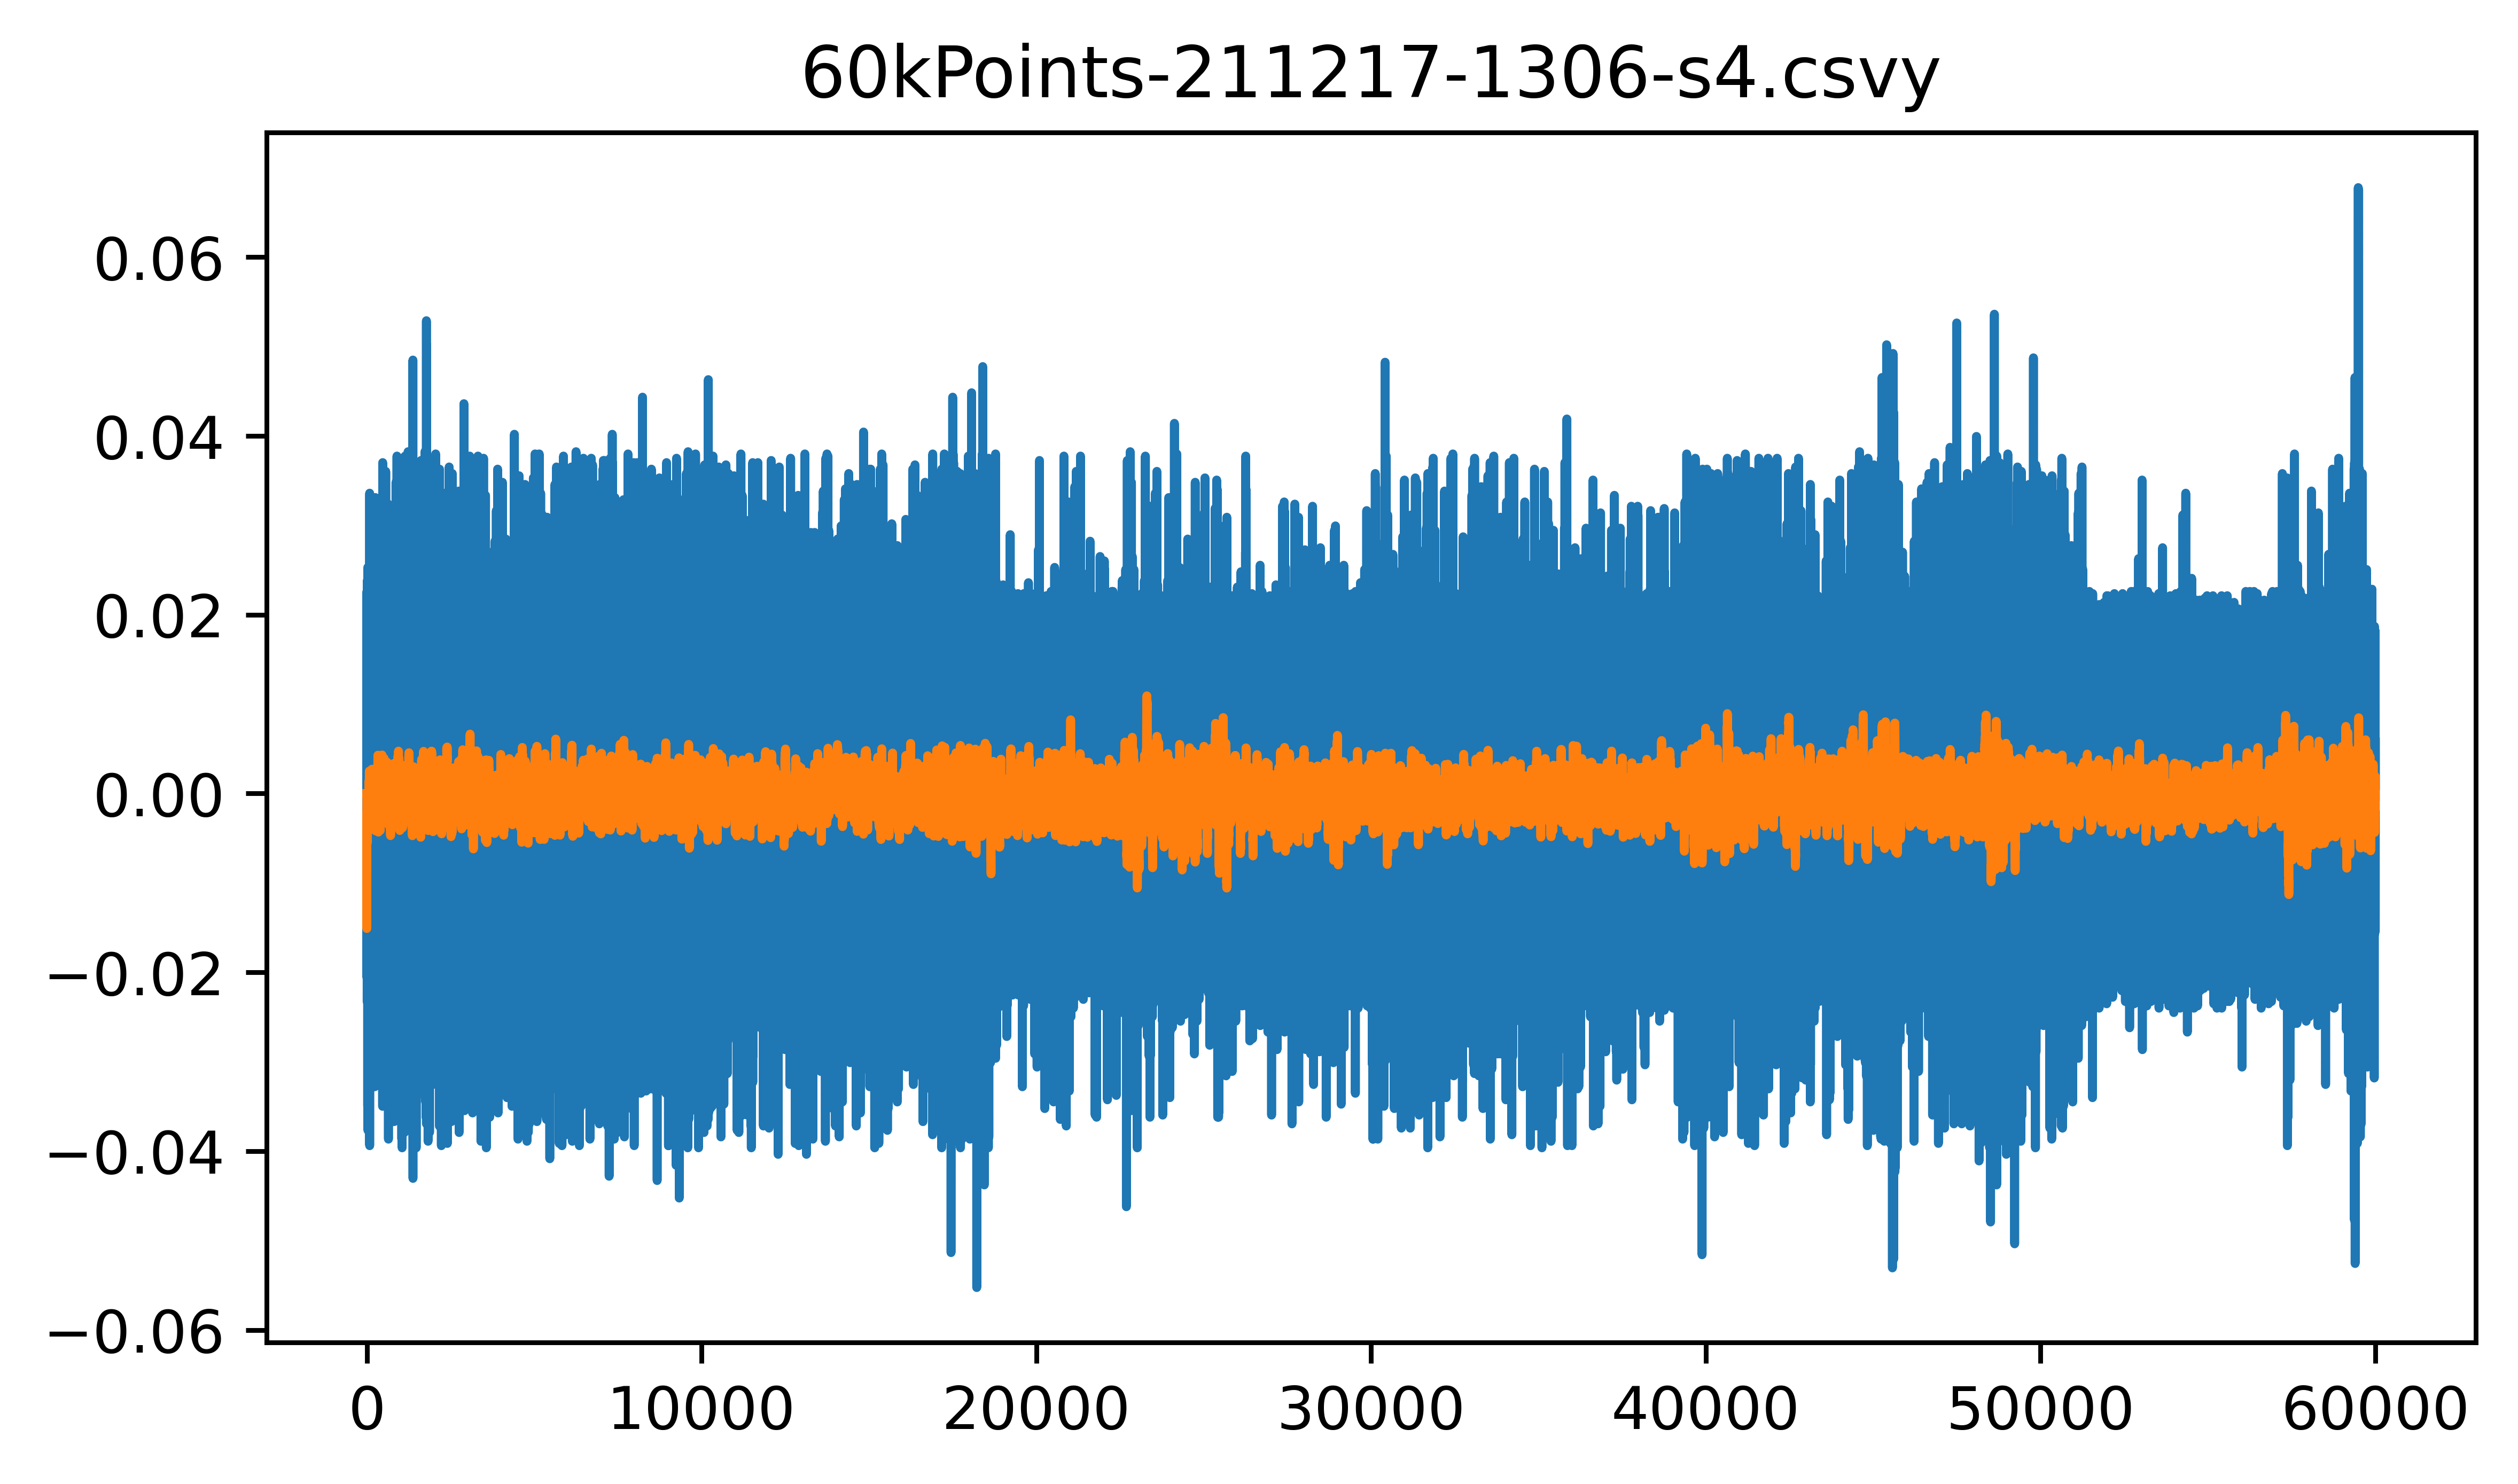

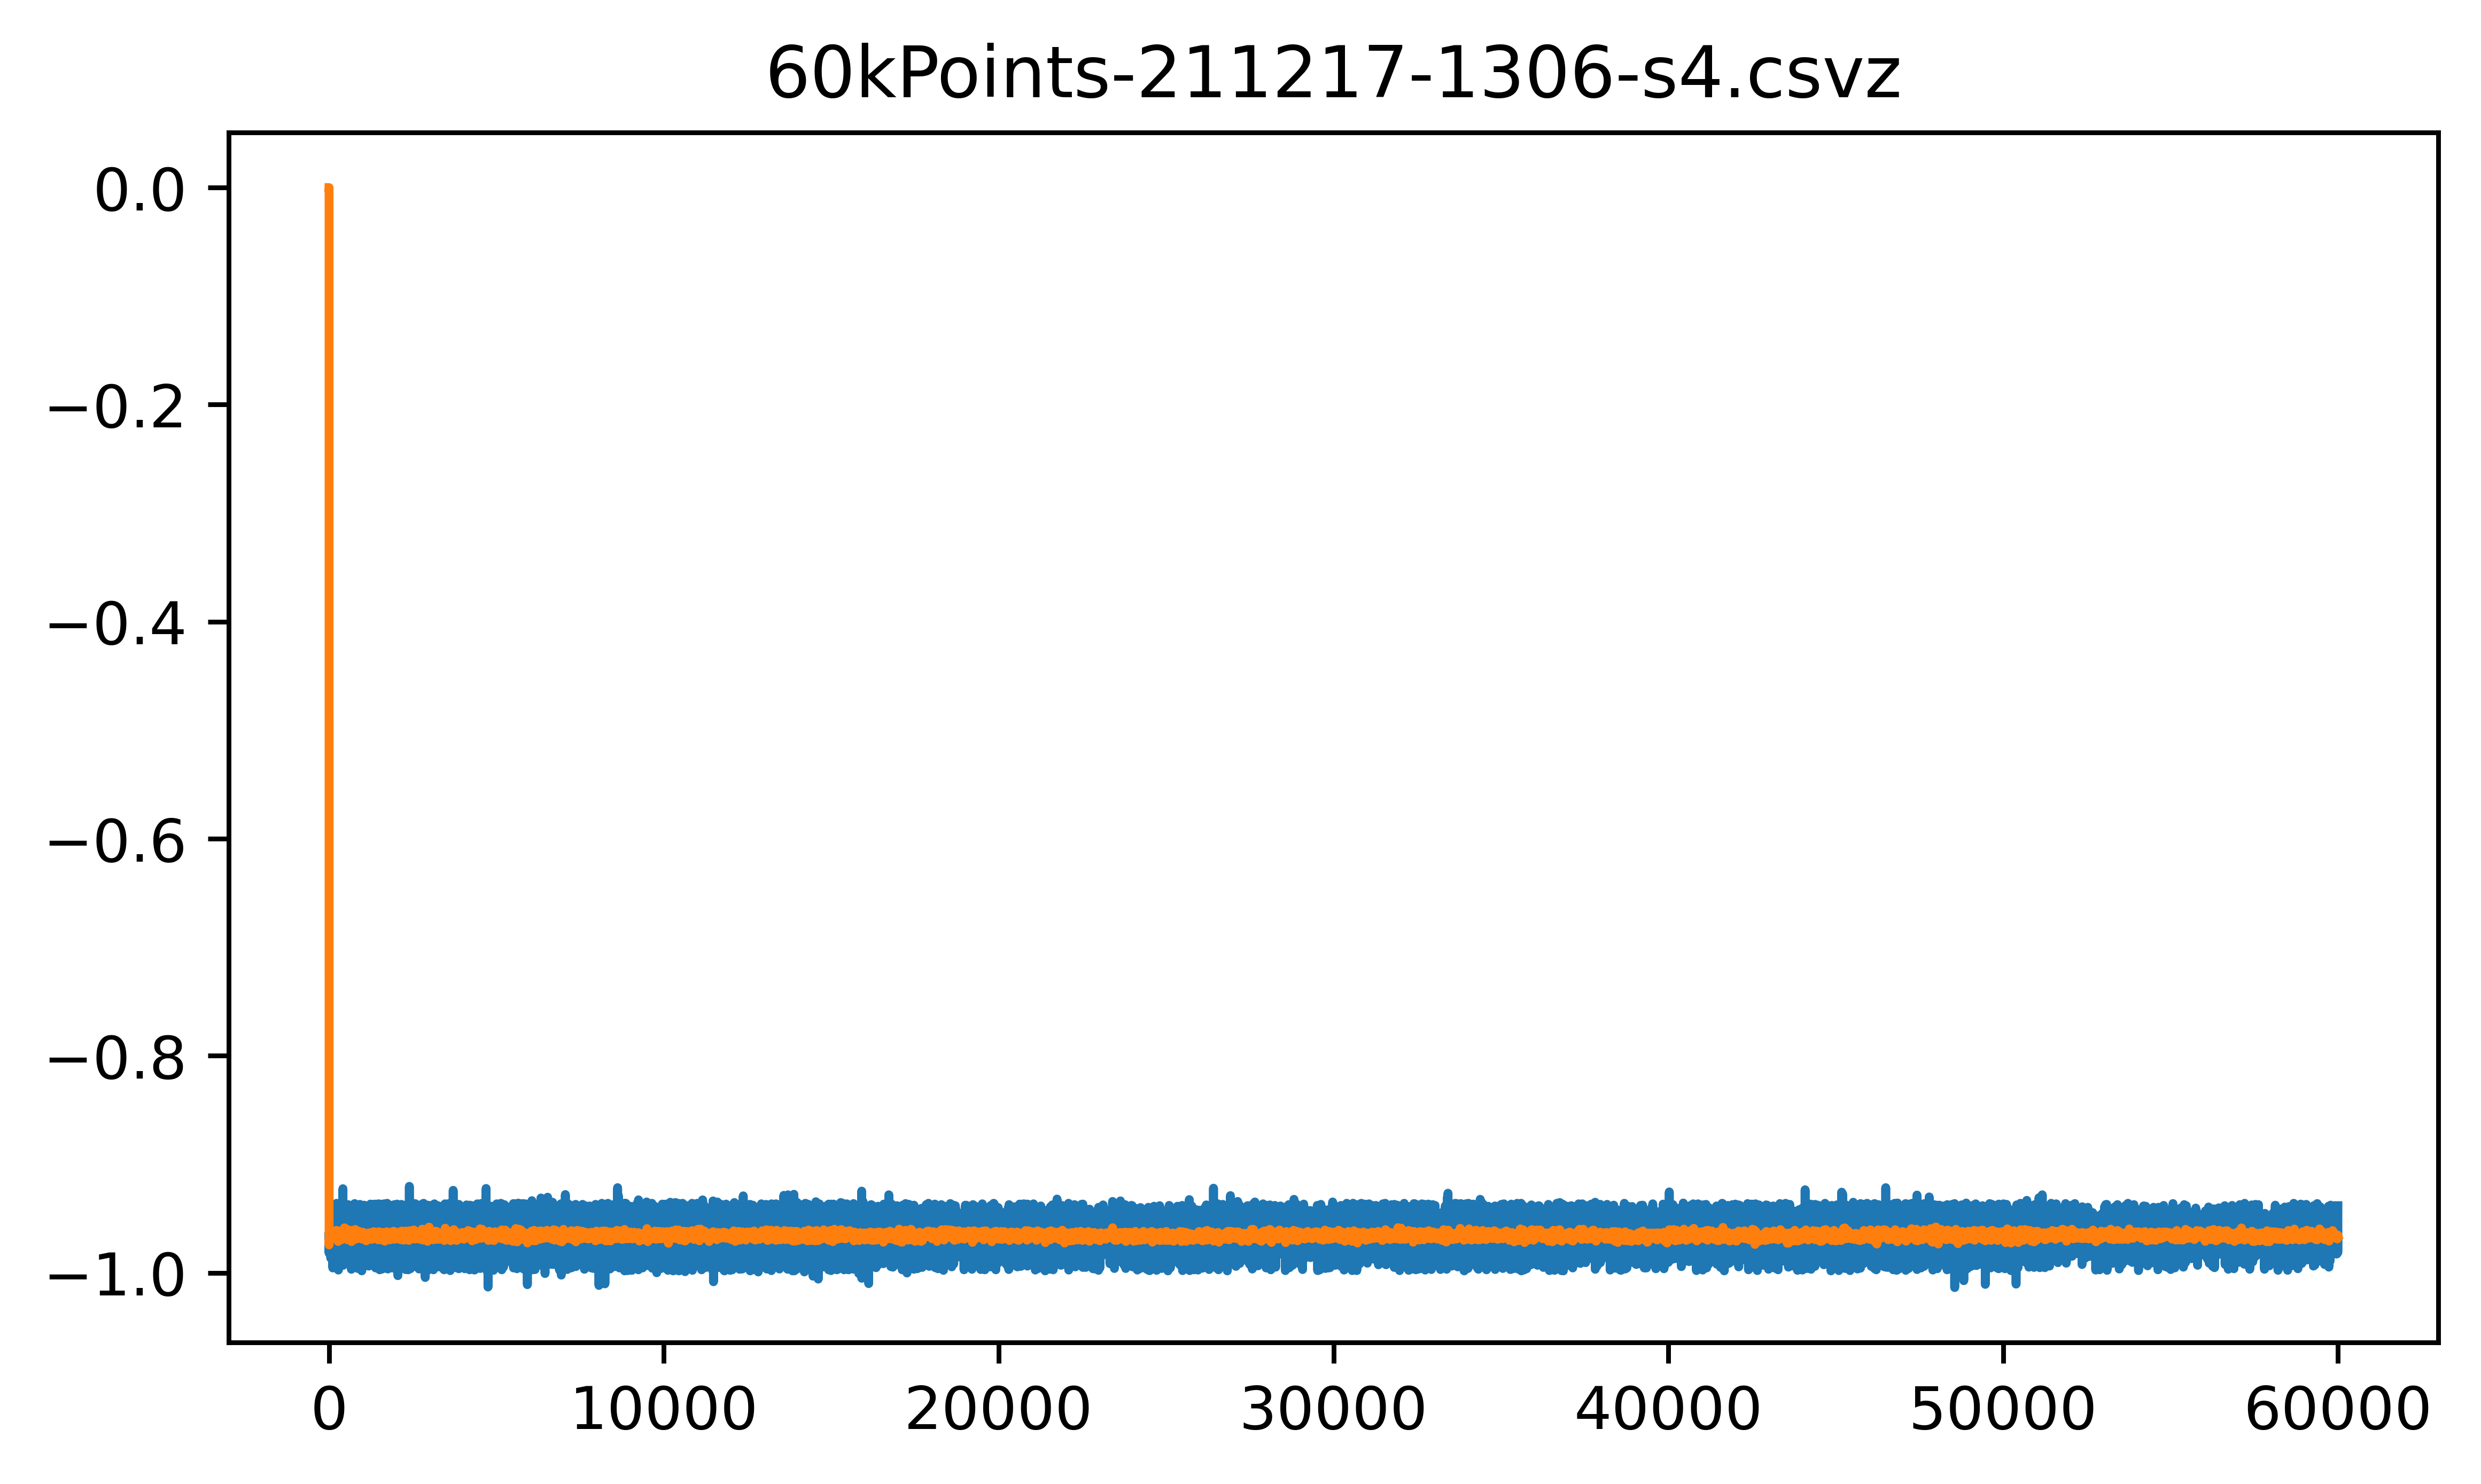

In [5]:
# Directory = './Data'
#Directory = 'C:\\Users\\Dan\\Desktop\\Temp\\'
#Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'

Directory = "C:\\Data\\SmallCopy\\"

files = os.listdir(Directory)

files = random.sample(files,2)

#Reorder_cycler = (cycler('color', ['0.00', '0.70', '0.40', '0.90']) + cycler(linestyle=['-', '--', ':', '-.']))
#plt.rc('axes', prop_cycle=Reorder_cycler)

start = 0
end  =  60000

#start = 40000
#end = 45000

size = 5000
Arange = 25
coord = 2

Saving = True
location = Directory
Titles = True
Ledgends = False

for Filename in files:
    if Filename[-4:] ==  '.csv':
        ODataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=0)
        print(Filename,np.shape(ODataSet))
        ODataSet = ODataSet[start:end,:]
        
        length = np.shape(ODataSet)[0]

        SmoothRDataSet = np.zeros(np.shape(ODataSet)[0])
        SmoothXDataSet = np.zeros(np.shape(ODataSet)[0])
        TdDataSet = np.zeros(np.shape(ODataSet)[0])

        results =[]

        fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)

        smooth=np.zeros((length,18))


        #for i in range(int(length/size)):
        for i in range(3):
            # StdDev = np.zeros(length)
            # StdDevSmooth = np.zeros(length)
            coord = i+2
            
            SmoothRDataSet[0] = 0
            SmoothXDataSet[0] = 0
            # StdDev[0]=0
            # StdDevSmooth[0]=0

            fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)

            #factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

            #TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
            #TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
            #for j in range(Arange-1):
            #    k = j+2
            #    TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            #for j in range(length-Arange):
            #    k = (length-1)-j
            #    TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                smooth[k,i] = np.average(ODataSet[0:k,coord])
                #SmoothXDataSet[k] = np.average(ODataSet[0:k,coord])
                #StdDev[k]=st.stdev(ODataSet[0:k,coord])
                #StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
                #SmoothRDataSet[k] = np.average(TdDataSet[0:k])
            for j in range(length-Arange):
                k = (length-1)-j
                smooth[k,i] = np.average(ODataSet[k-Arange:k,coord])
                #SmoothXDataSet[k] = np.average(ODataSet[k-Arange:k,coord])
                #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
                #StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
                #SmoothRDataSet[k] = np.average(TdDataSet[k-Arange:k])
            
            plt.plot(ODataSet[:,coord], label = 'Original ' + Header[coord])
            plt.plot(smooth[:,i], label = 'Smooth ' + Header[coord])
            #plt.plot(SmoothXDataSet[:], label = 'Smooth ' + Header[coord])
            #plt.plot(TdDataSet[start:end]) #, label = 'Smoothed Signal')
            #plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
            #plt.plot(SmoothRDataSet[start:end]) #, label = 'Smoothed Signal')
            
            plt.title(Filename + Header[coord])
            if Saving: plt.savefig(location+Filename+Header[coord].replace(" ", "").replace(":", "").replace(",", "")+FFormat)
            plt.show()
            #print(title,max(StdDev),max(SmoothXDataSet[start:end]))
        
        # title = Filename #+ ' ' + Header[coord]
        # if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        
        # if Ledgends: plt.legend()
        # if Titles: plt.title(title)
        
        # plt.show()
        
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

Saving = True
Titles = True

In [6]:
#trys = ['coif1','coif2','mexh','gaus2','dmey','gaus1','morl','cgau1','cgau2','db1','db2','sym1','sym2','sym3']
#trys = ['coif2','mexh','gaus2','db1','sym2']
#trys = ['gaus2'] #,'gaus1','gaus2','gaus3','gaus5']
wvlt = 'gaus2'

Titles = False
Saving = True

Saving = False
Titles = True

start = 1400
end = 3100
coord = 1
scales = 50
slices = 20
trim = 100

#for segmenets in range(24):
#    start = segmenets * 2500
#    end = start + 5000
#for id in trys:
    #try:
#        for cord in range(1):
#           coord = cord + 1
            #PlotFingerPrint(ODataSet[start:end,coord],'a','Raw data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(SmoothDataSet[start:end,coord],'a','Smoothed data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(StdDev[start:end],'a',id + 'StdDev from '+str(start)+' to '+str(end),id,scales,slices,trim)
            #PlotFingerPrint(StdDevSmooth[start:end],'a',id + 'Wavelet from '+str(start)+' to '+str(end),id,500,5)
#            PlotFingerPrint(TdDataSet[start:end],'a',id + 'Wavelet on r series from '+str(start)+' to '+str(end),id,500,5)
#            PlotFingerPrint(SmoothDataSet[start:end],'a','Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            
    #except:
#        print(id)

1700 50


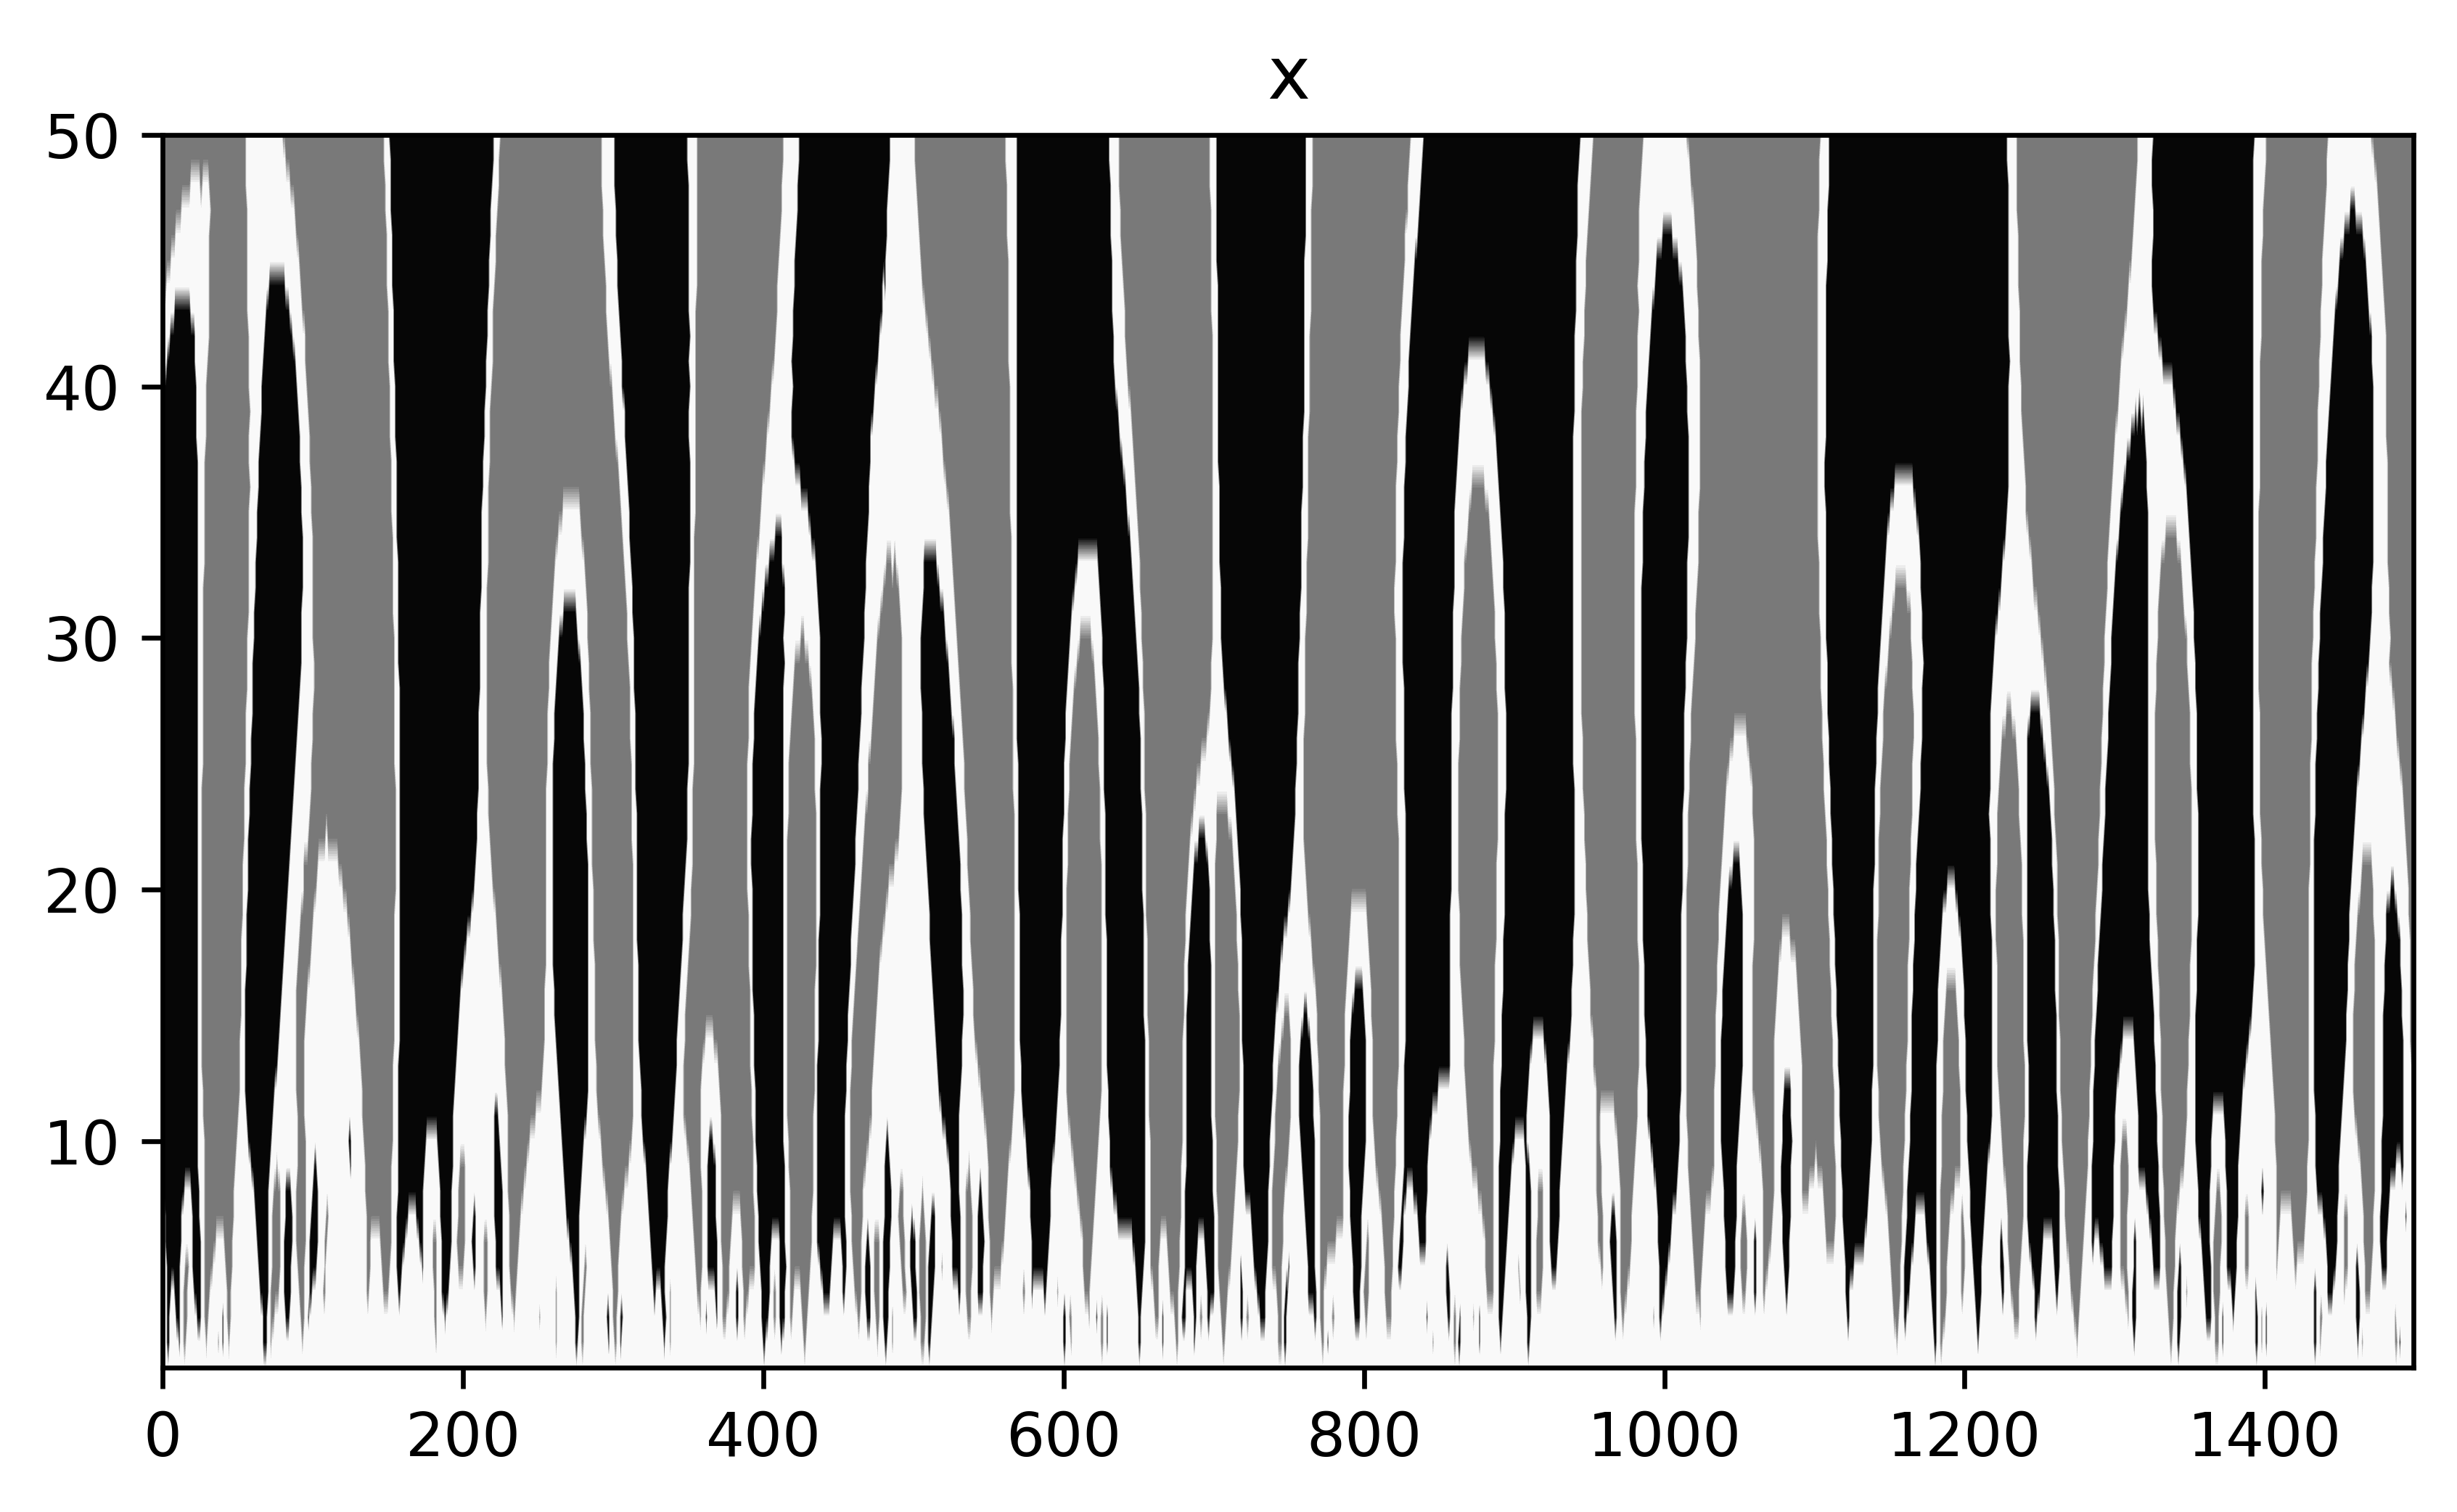

1700 50


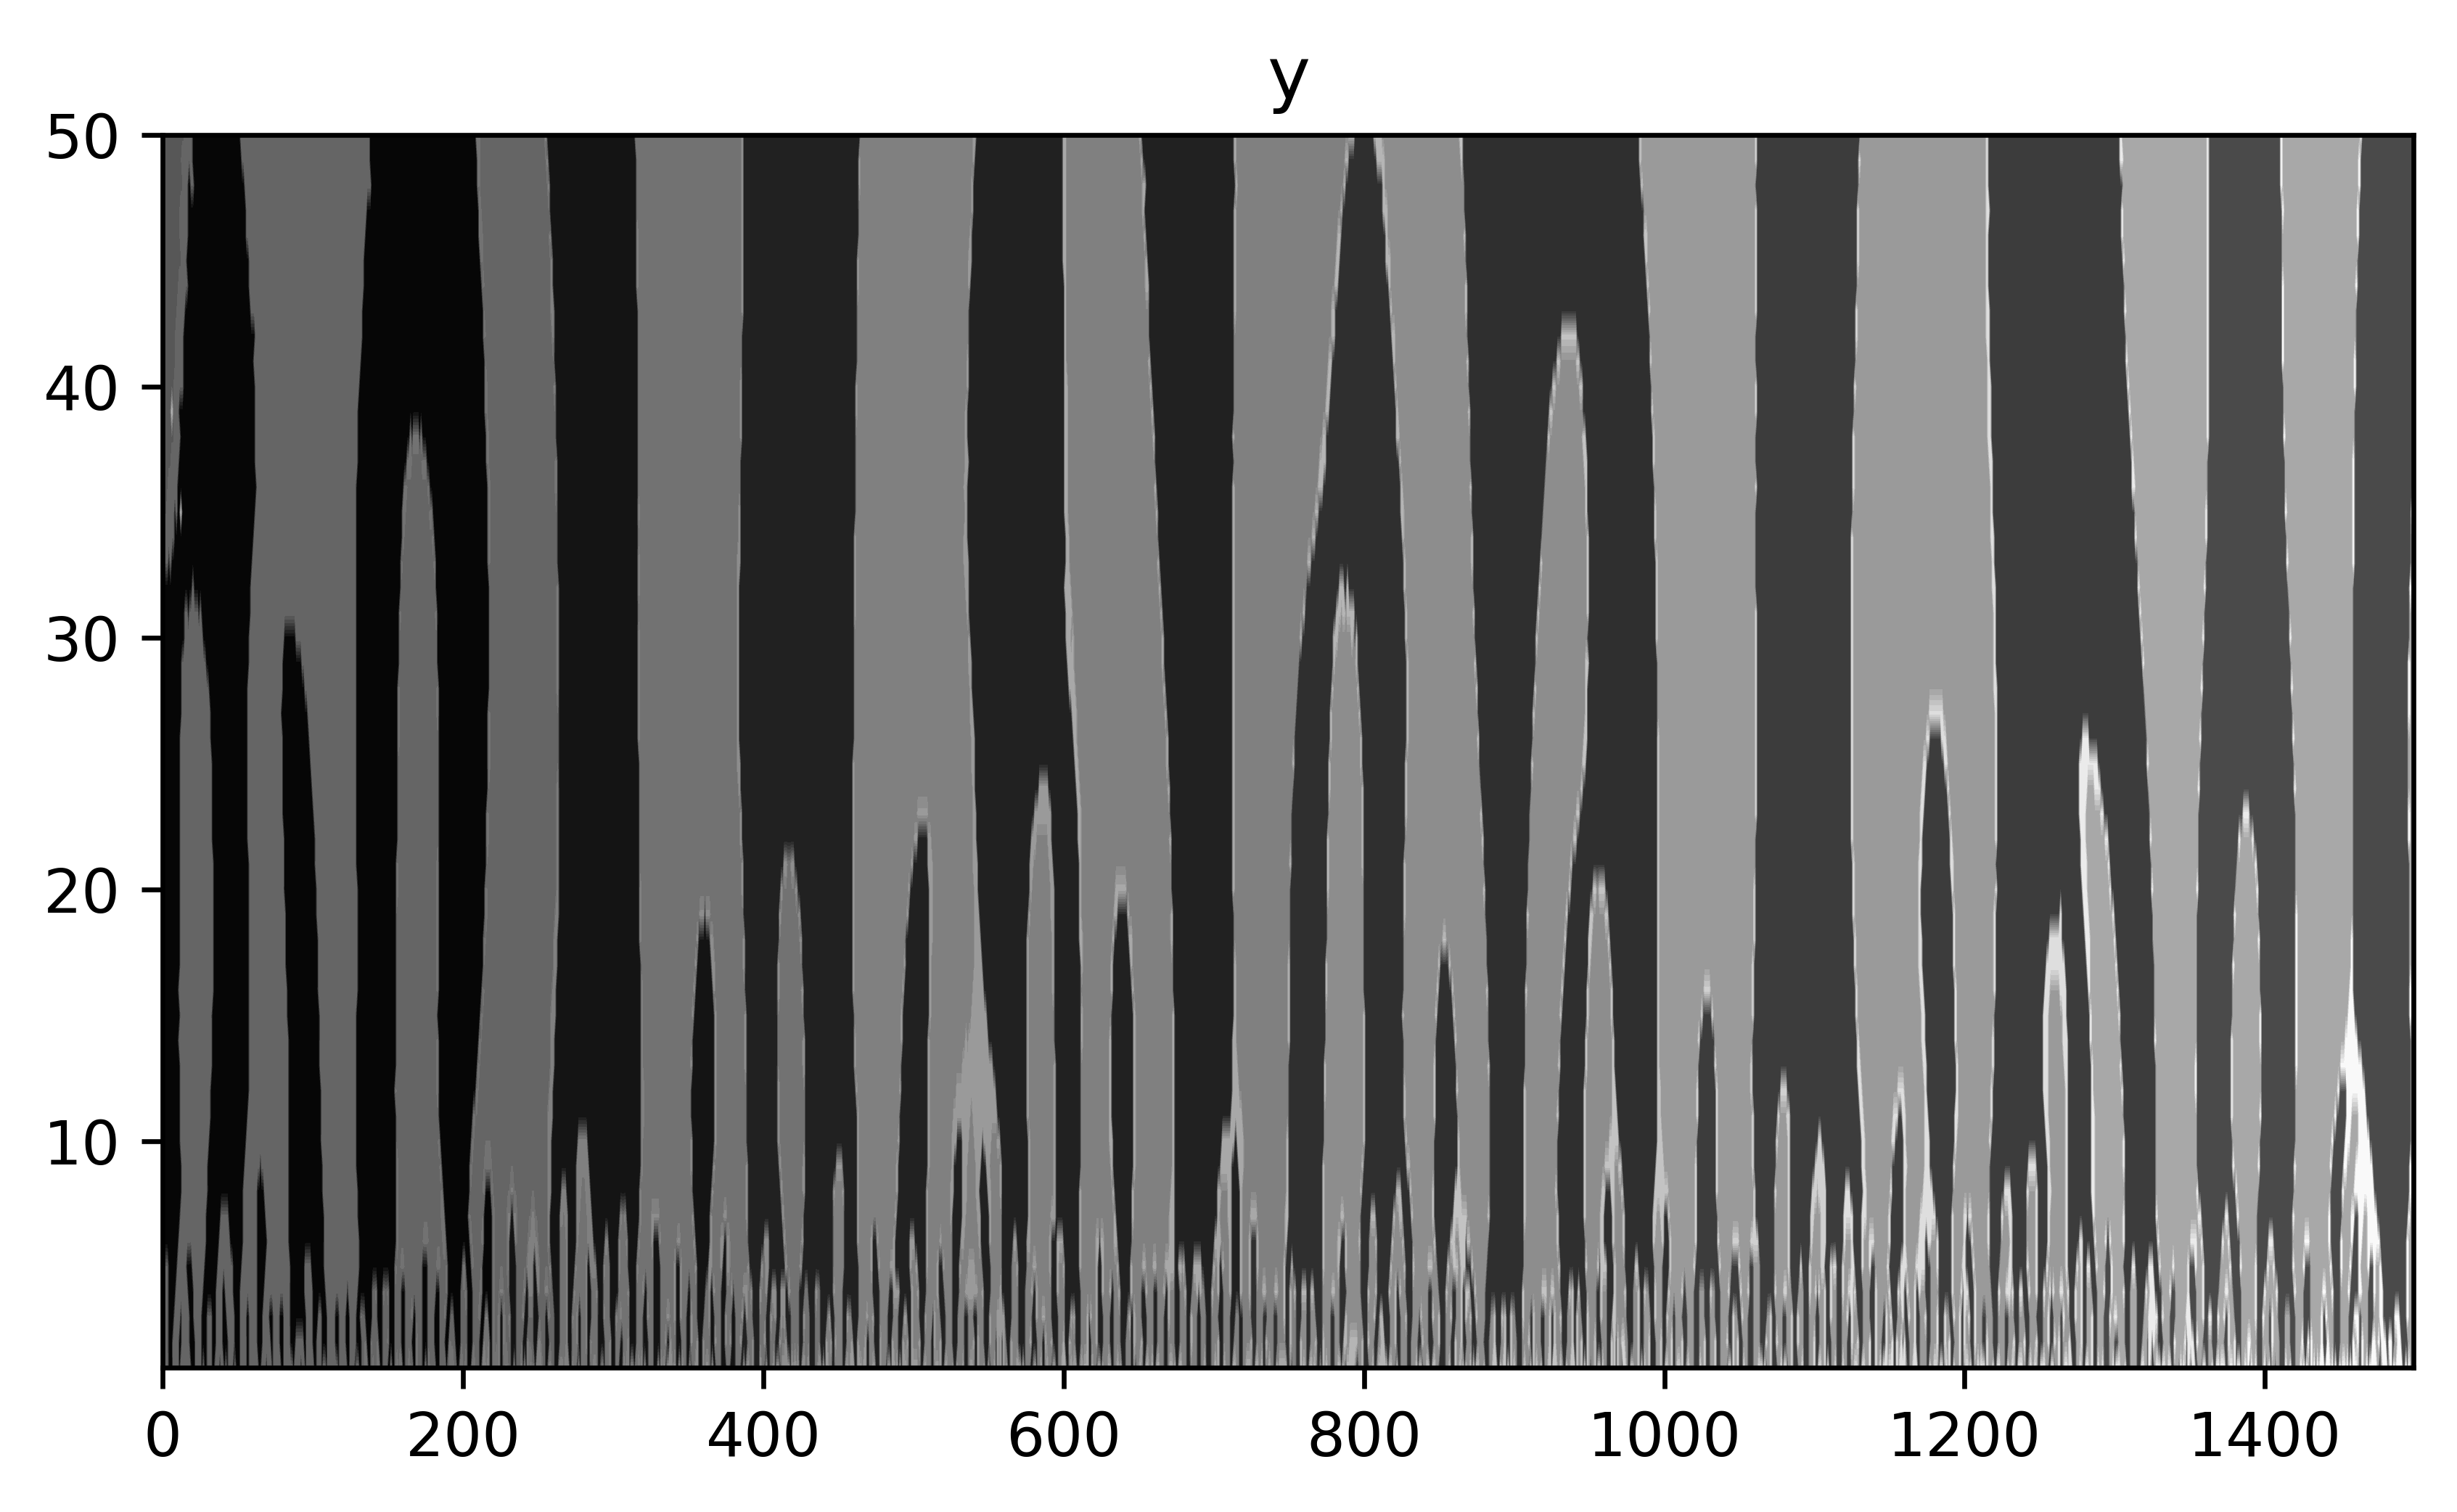

1700 50


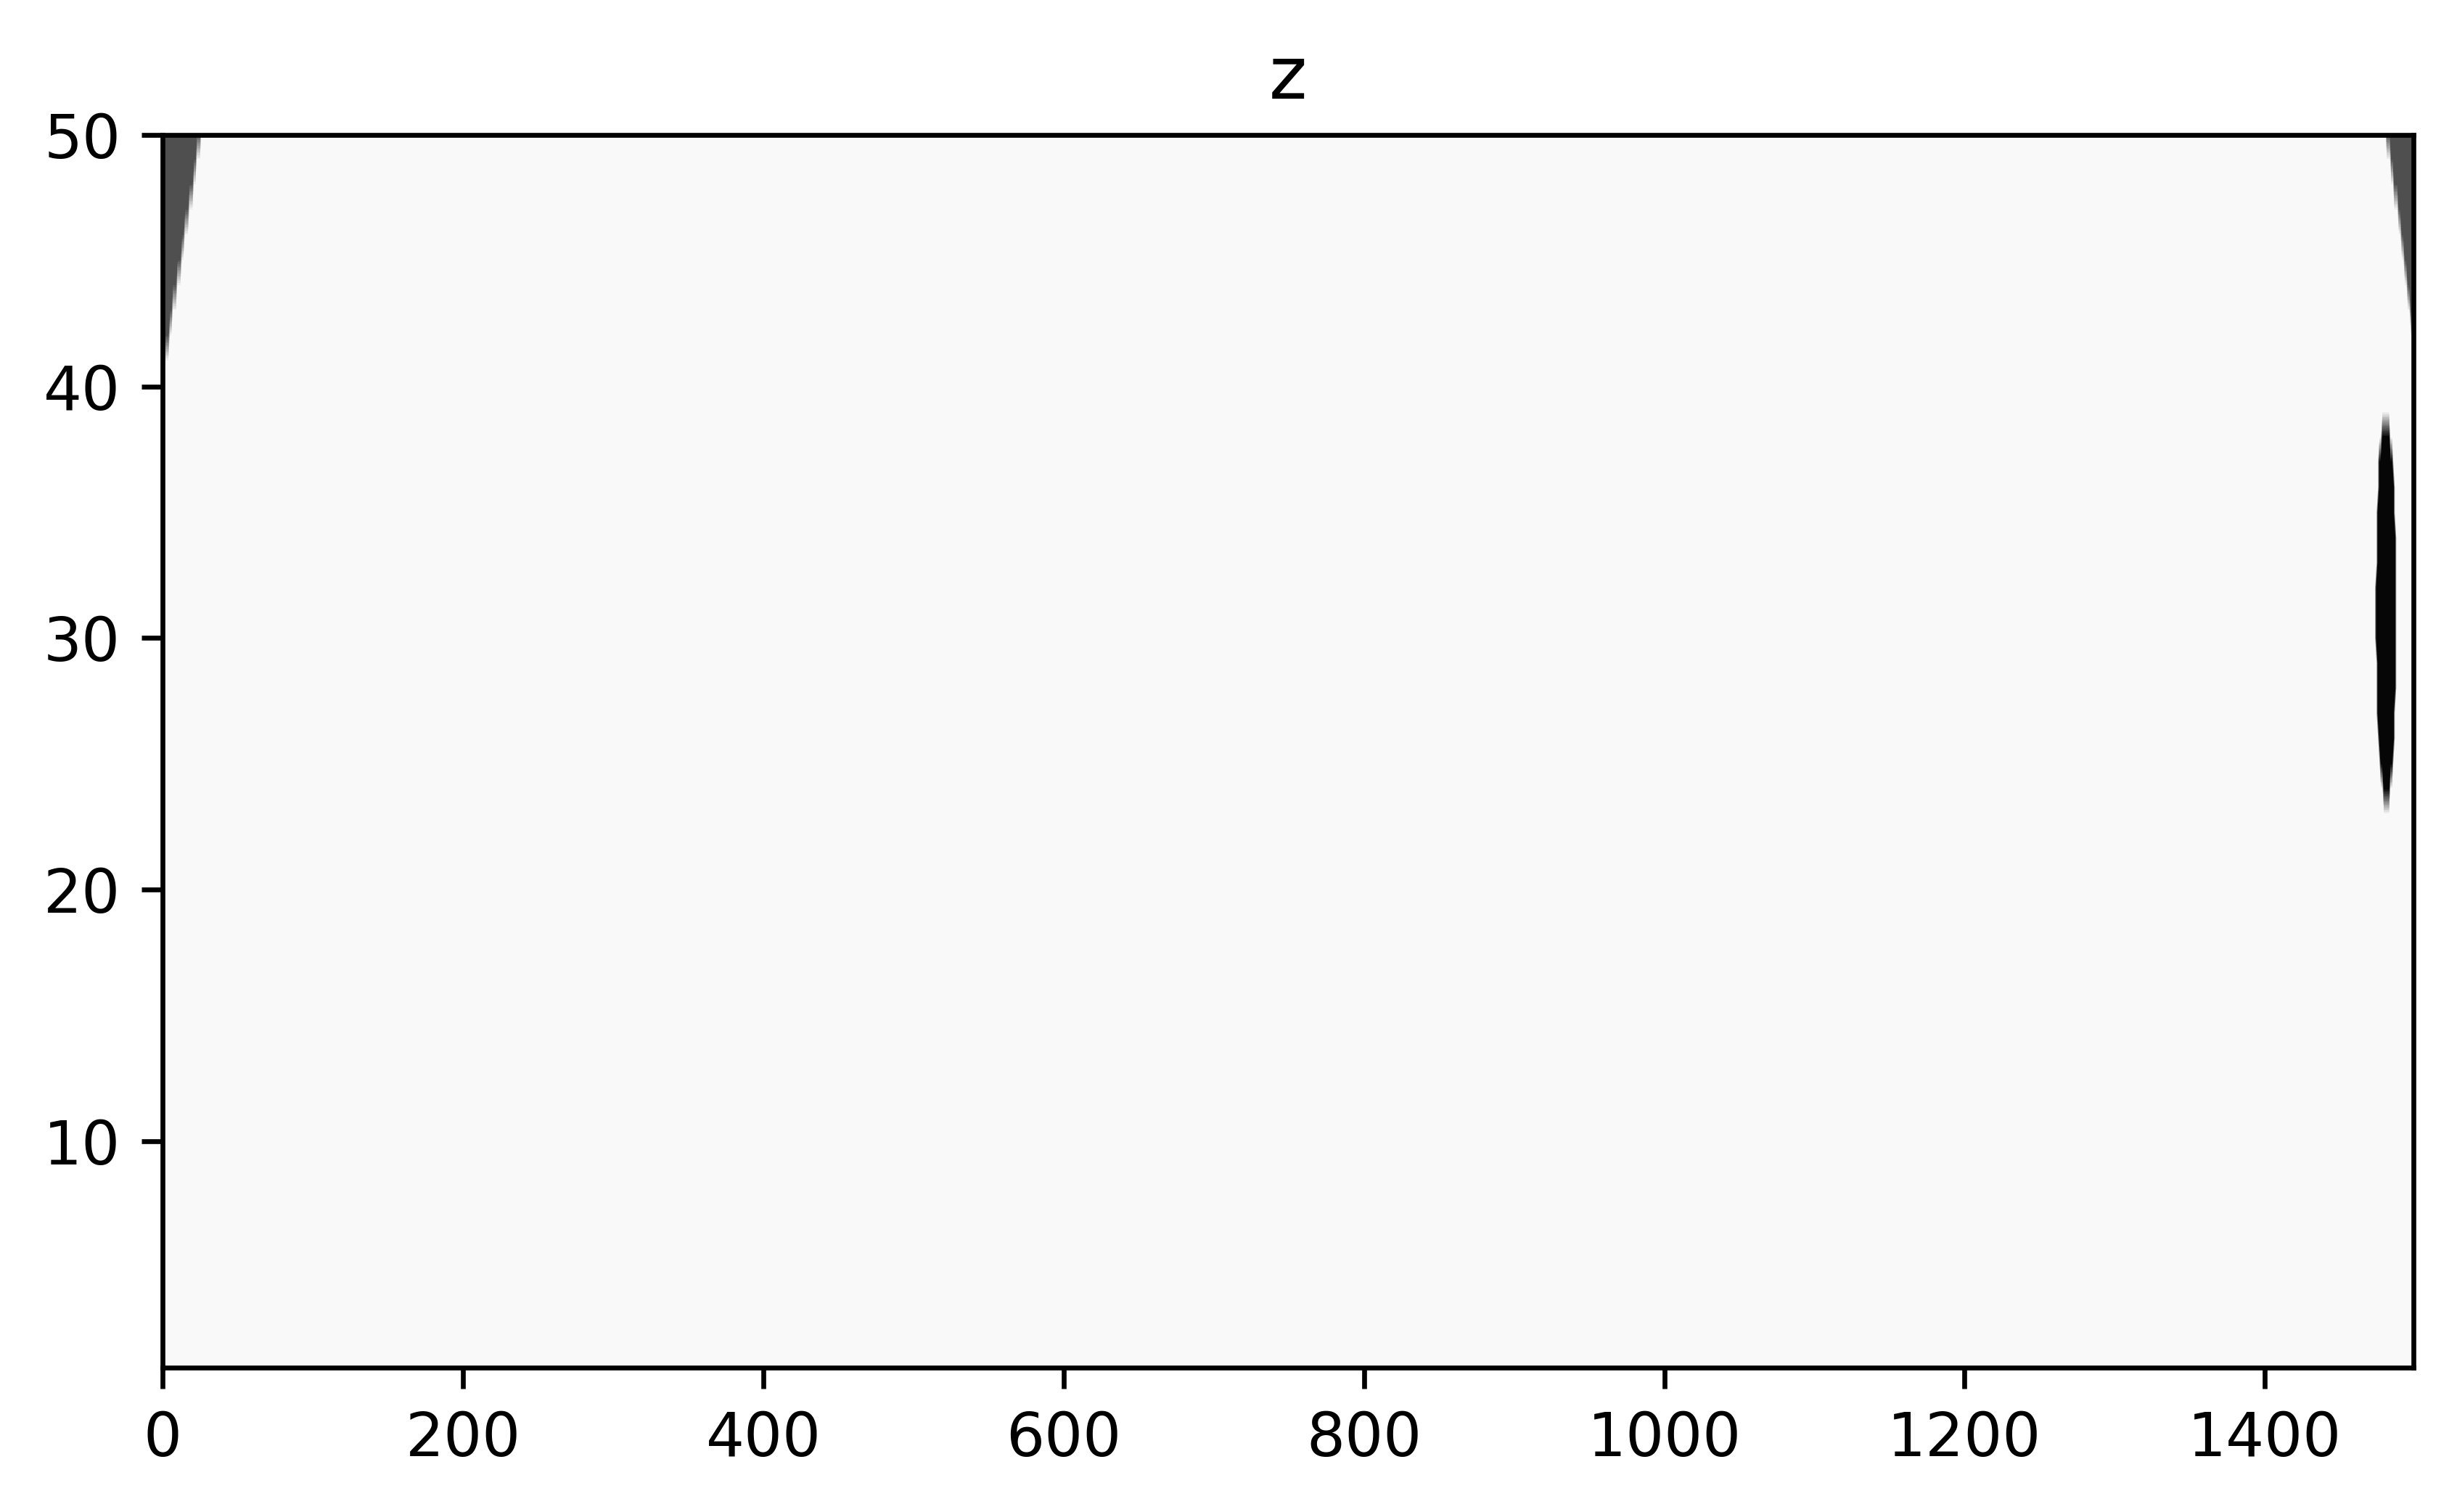

In [7]:
for i in range(3):
    coord = i+2
    FpScat = fp.getLabeledThumbprint(smooth[start:end,i], wvlt,scales,slices,0.12,'both')
    #FpScat = fp.getLabeledThumbprint(ODataSet[start:end,coord], wvlt,scales,slices,0.12,'both')
    PlotFingerPrint(FpScat,'a',Header[coord],wvlt,scales,slices,trim)

In [8]:
np.shape(ODataSet)

(60000, 6)

MovieWriter ffmpeg unavailable; using Pillow instead.


1700 30


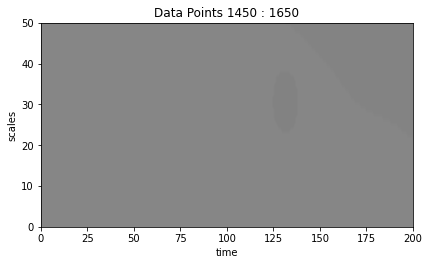

In [9]:
#y = np.linspace(0, BeamLength, np.shape(CenterZResults[0][0])[1])
#x = np.linspace(0, BeamHeight, np.shape(CenterZResults[0][0])[0])

import matplotlib.animation as animation


Spacing = 4
ZoomSize = 200
Step = int(ZoomSize/Spacing)
Length = np.shape(FpScat)[1]
Frames = int(Length/ZoomSize)*Spacing - Spacing + 2

y = np.linspace(0, scales, scales)
x = np.linspace(0, ZoomSize, ZoomSize)
x,y = np.meshgrid(x,y)

fig = plt.figure(plt.figure(figsize=(6.67,3.75)),dpi=600)
#ax = plt.axes(xlim=(0, BeamHeight), ylim=(0, BeamLength))  

plt.ylabel(r'scales')
plt.xlabel(r'time')


print(Length, Frames)

def animate(i):
    start = i * Step
    end = start + ZoomSize 
    #print(i,start,end)
    z = np.matrix(FpScat[:,start:end])
    plt.title('Data Points ' +str(start) + ' : ' + str(end))
    cont = plt.contourf(x, y, z, levels=scales, cmap='gray',vmin=-100, vmax=100)
    #time.sleep(1)
    return cont  

anim = animation.FuncAnimation(fig, animate, frames=30)

anim.save('animation.gif')

1700 50


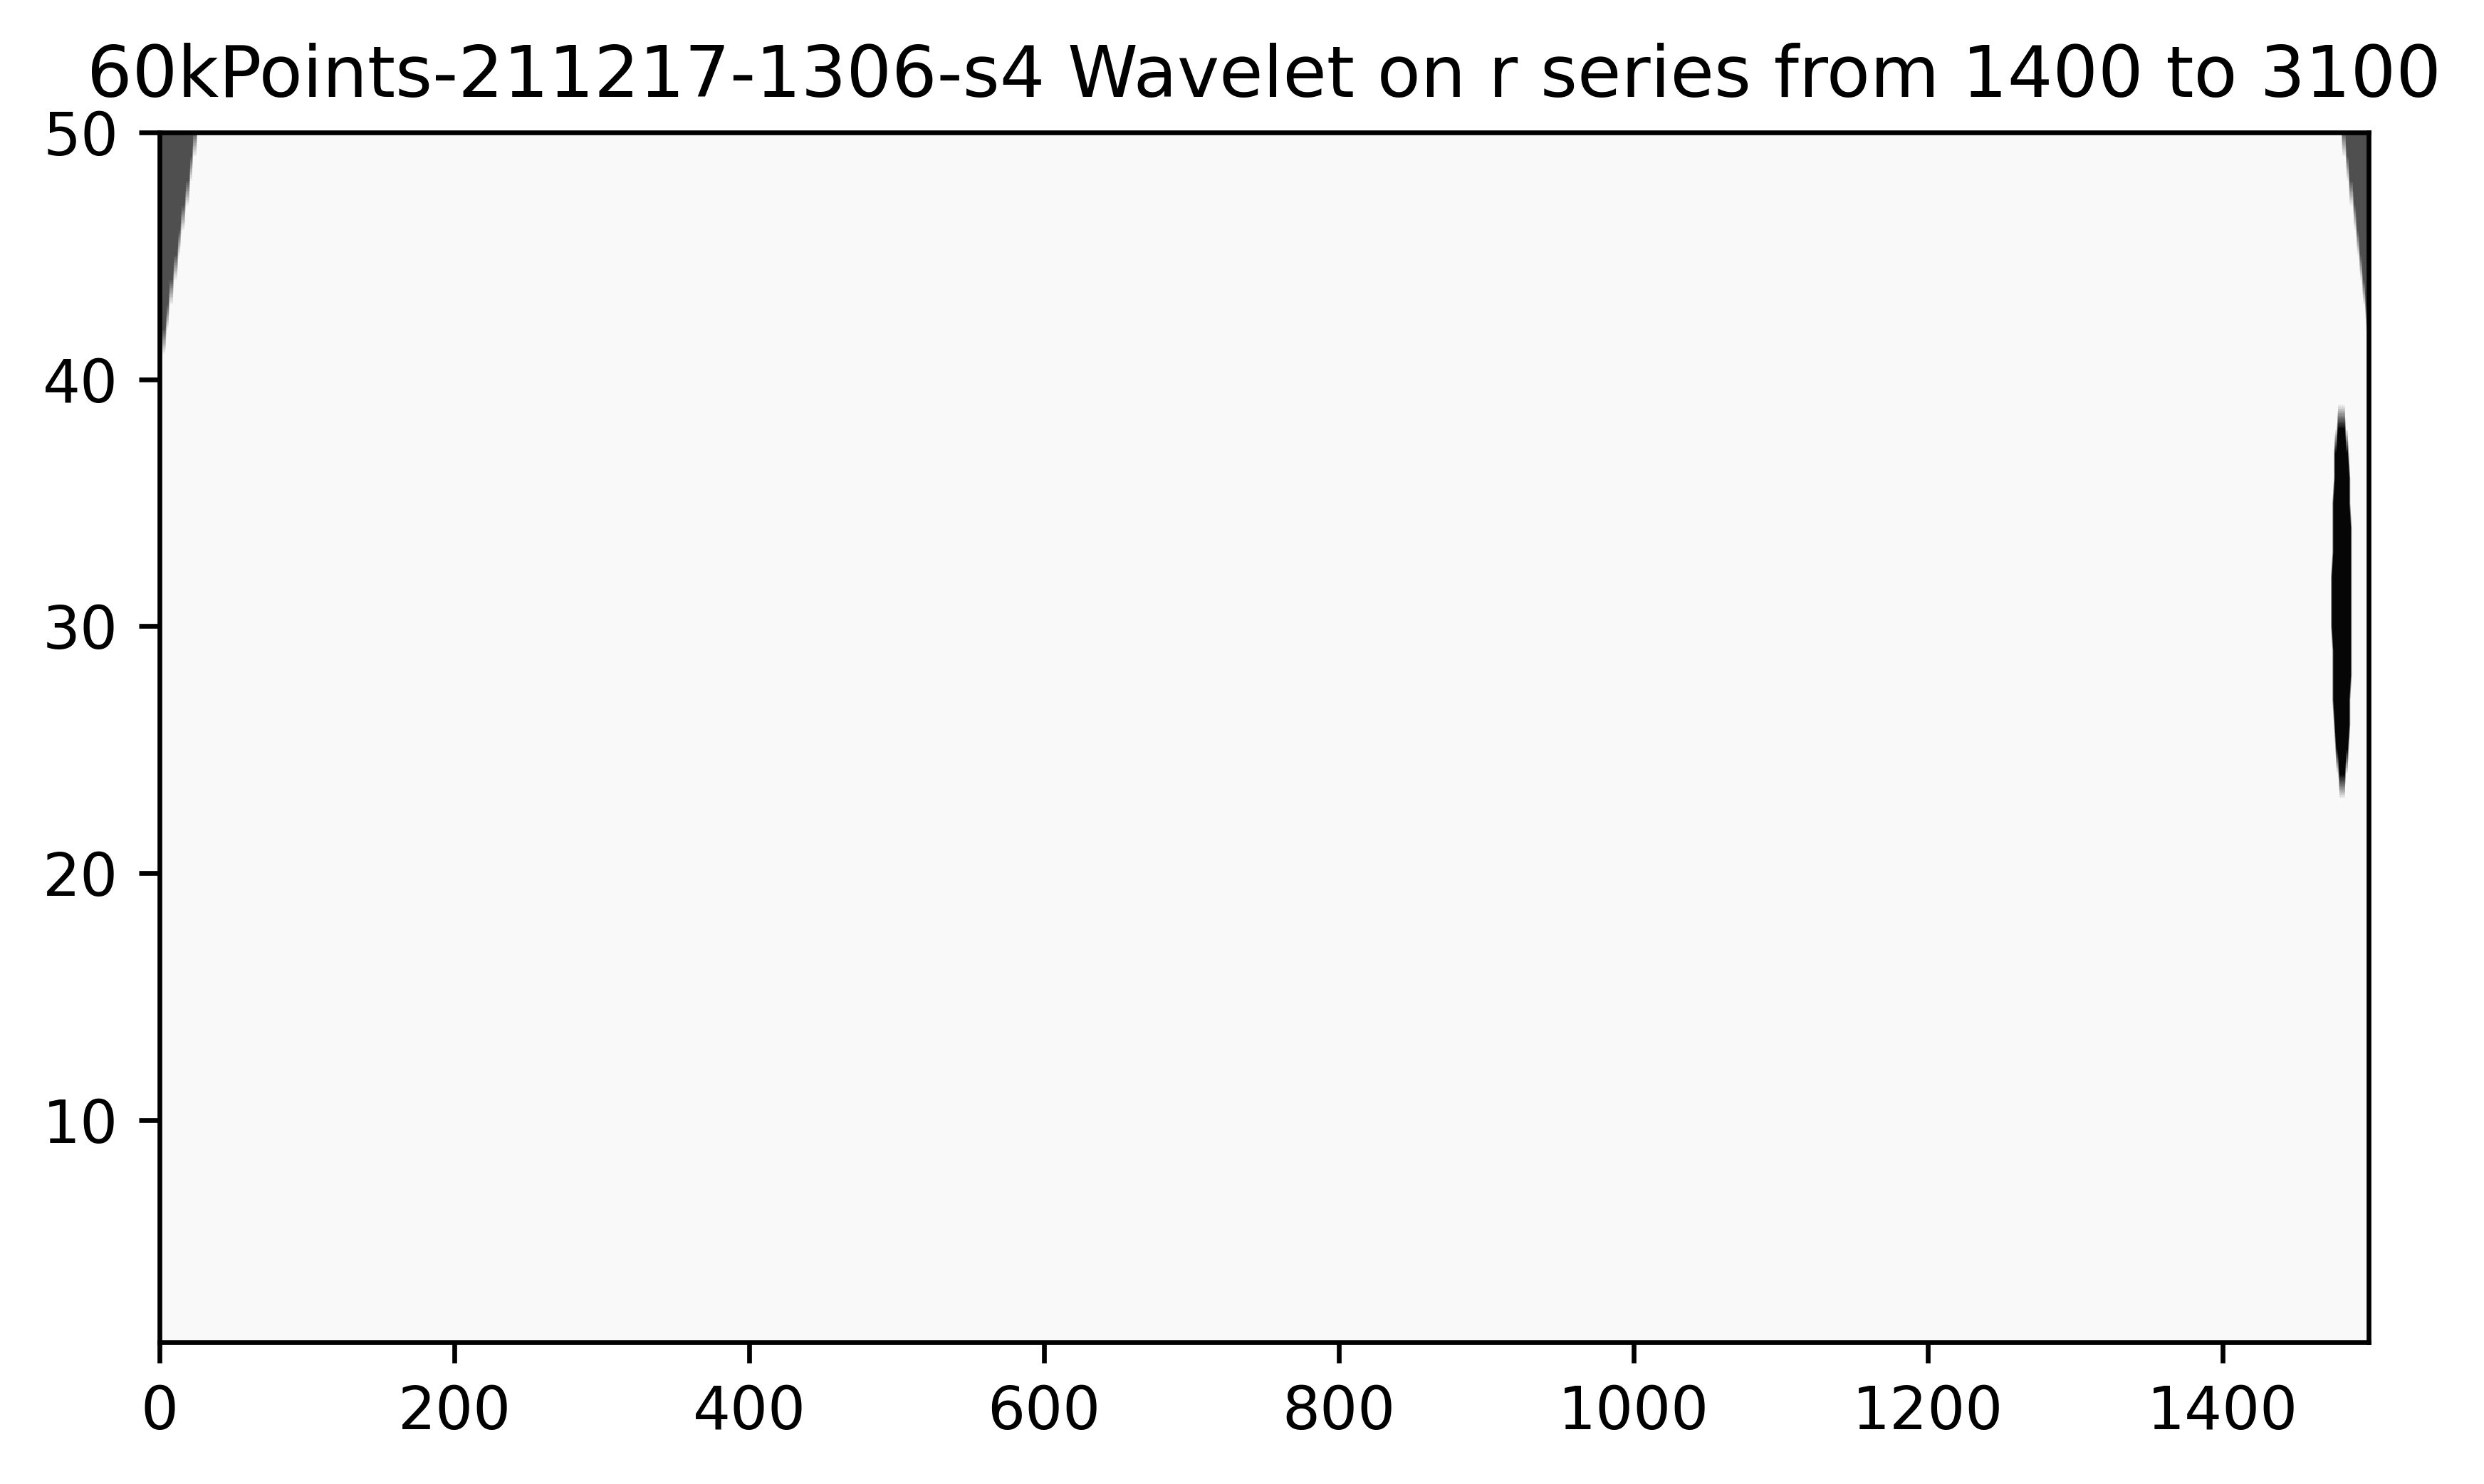

In [10]:
PlotFingerPrint(FpScat,'a',Filename[:-4] + ' Wavelet on r series from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [11]:
FpScatR = fp.getLabeledThumbprint(SmoothRDataSet[start:end], wvlt,scales,slices)

c:\Users\danhe\Code\RMG_NDE_Disssertation\DWFT.py:192: RuntimeWarning: invalid value encountered in true_divide
  cfX = np.true_divide(cfX, abs(cfX).max()*normconstant)


1700 50


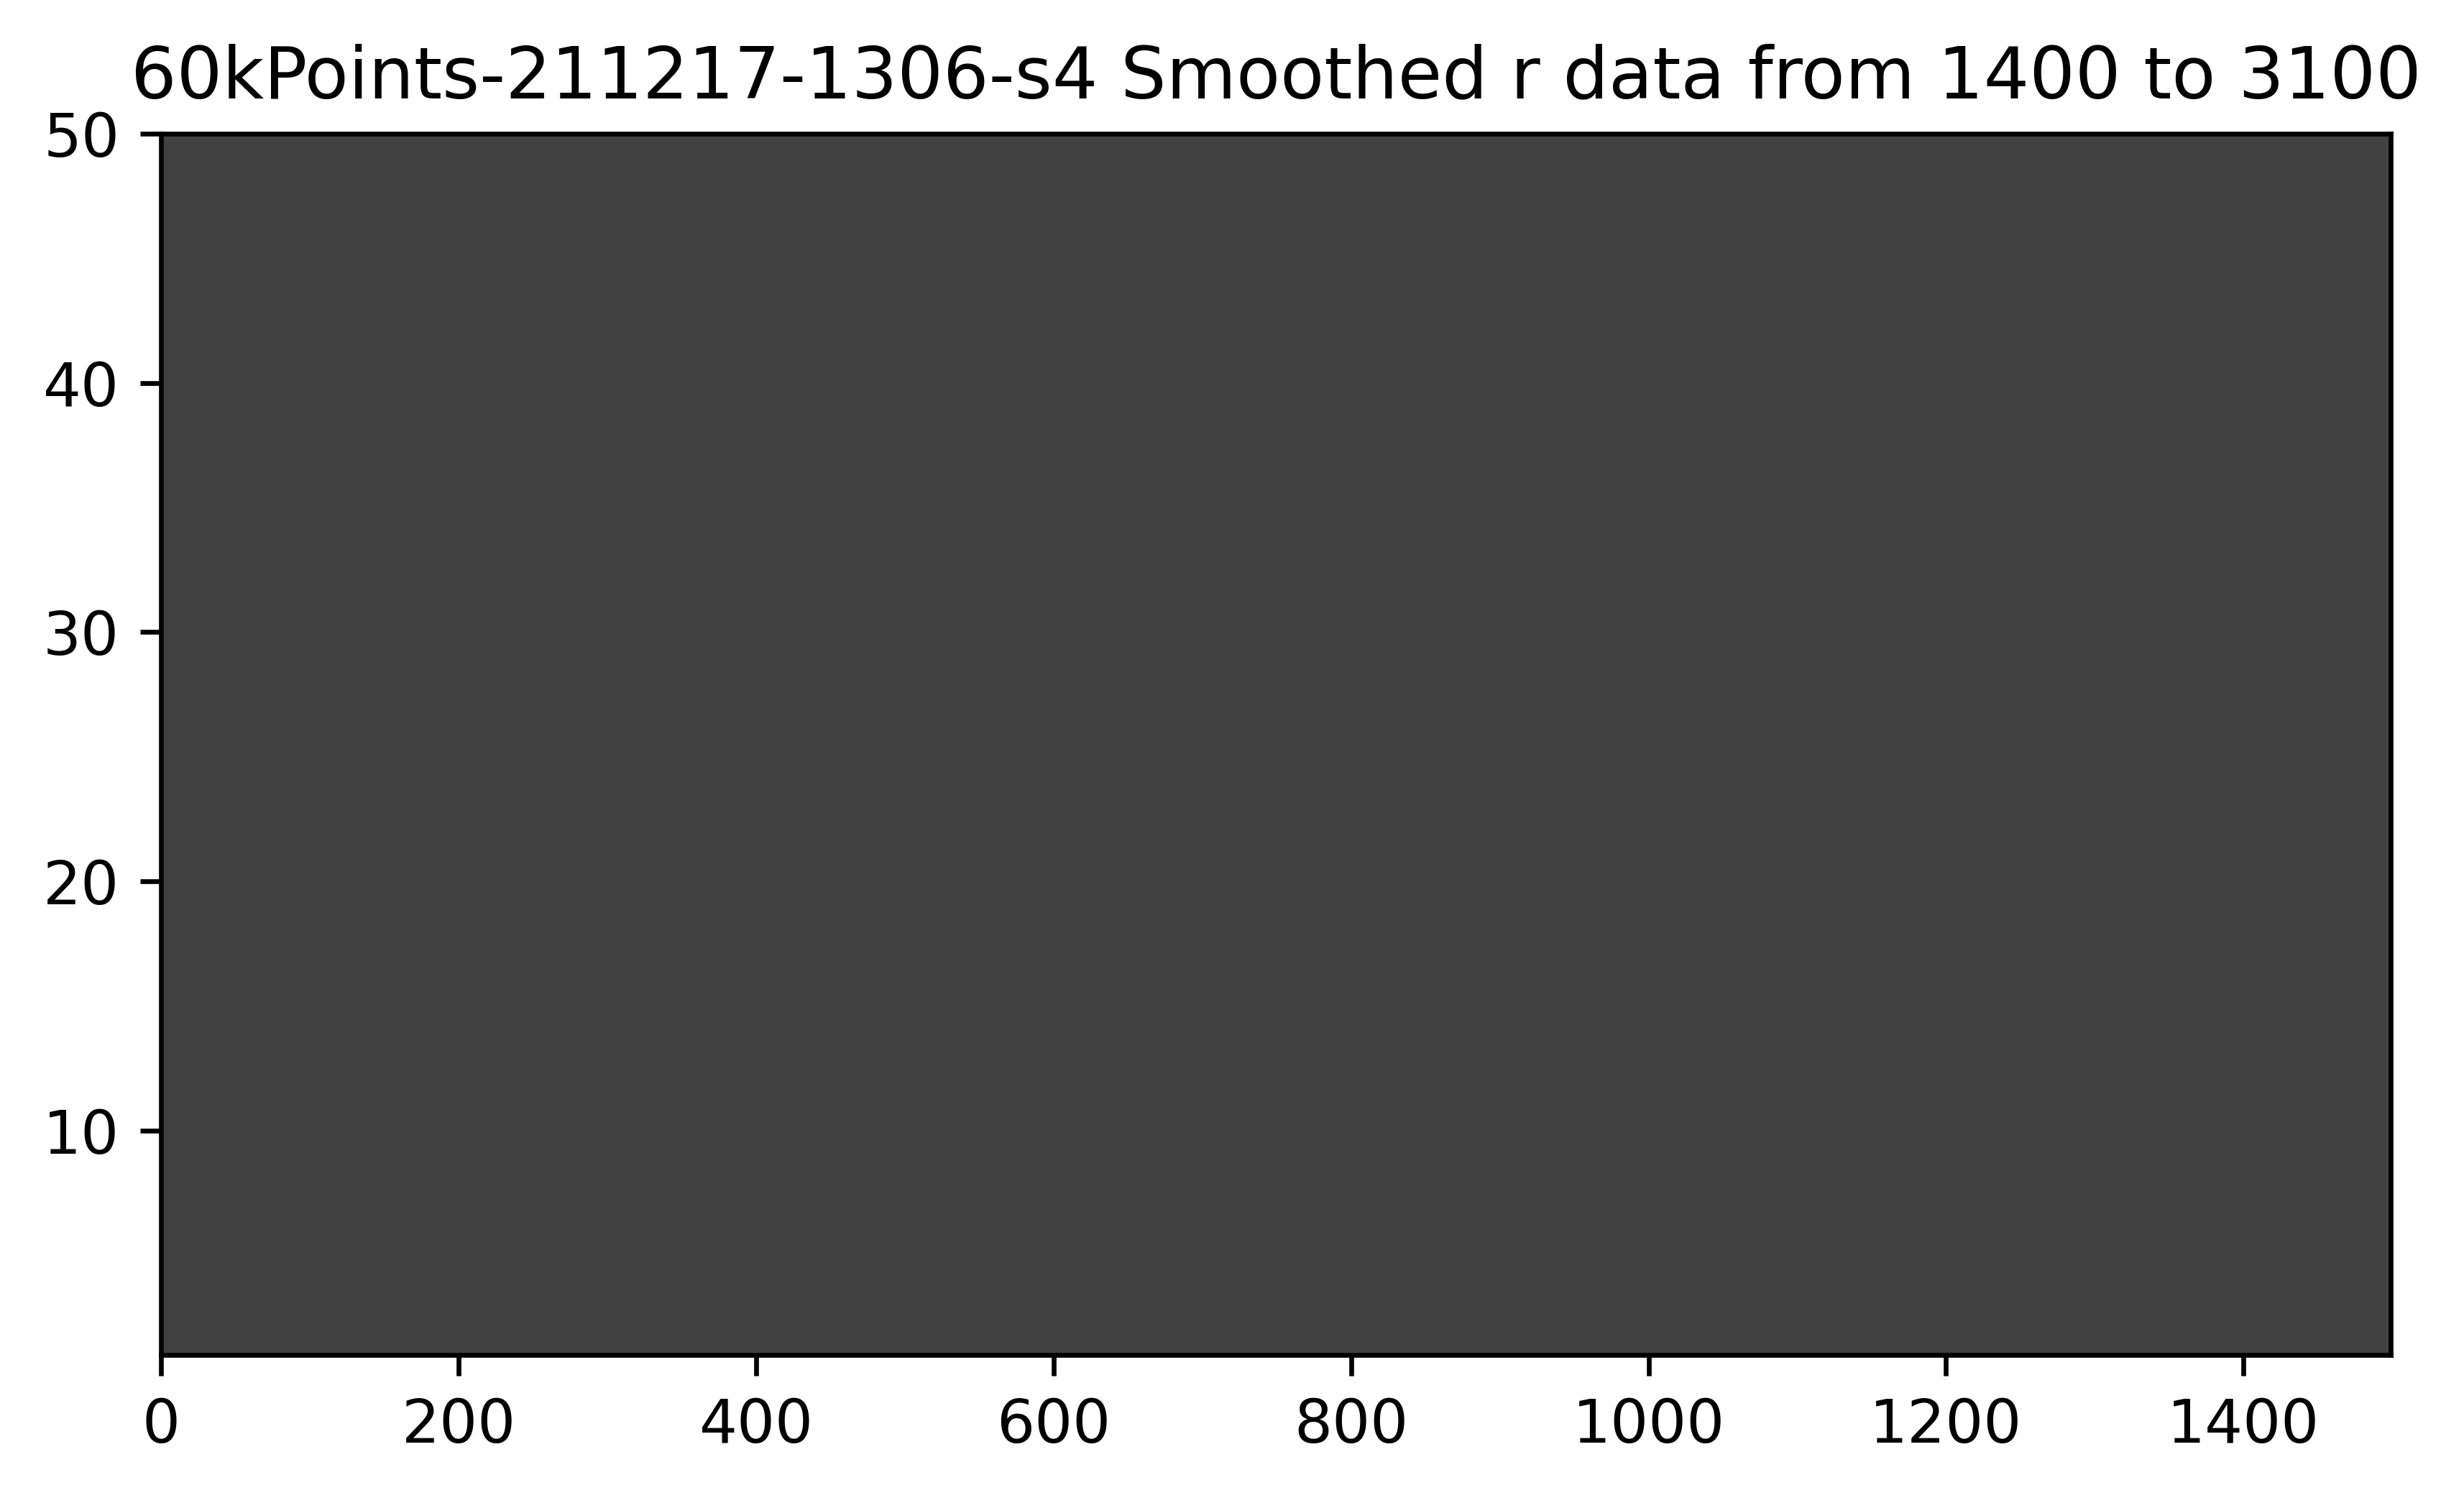

In [12]:
PlotFingerPrint(FpScatR,'a',Filename[:-4] + ' Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [13]:
FpScatX = fp.getLabeledThumbprint(SmoothXDataSet[start:end], wvlt,scales,slices)

1700 50


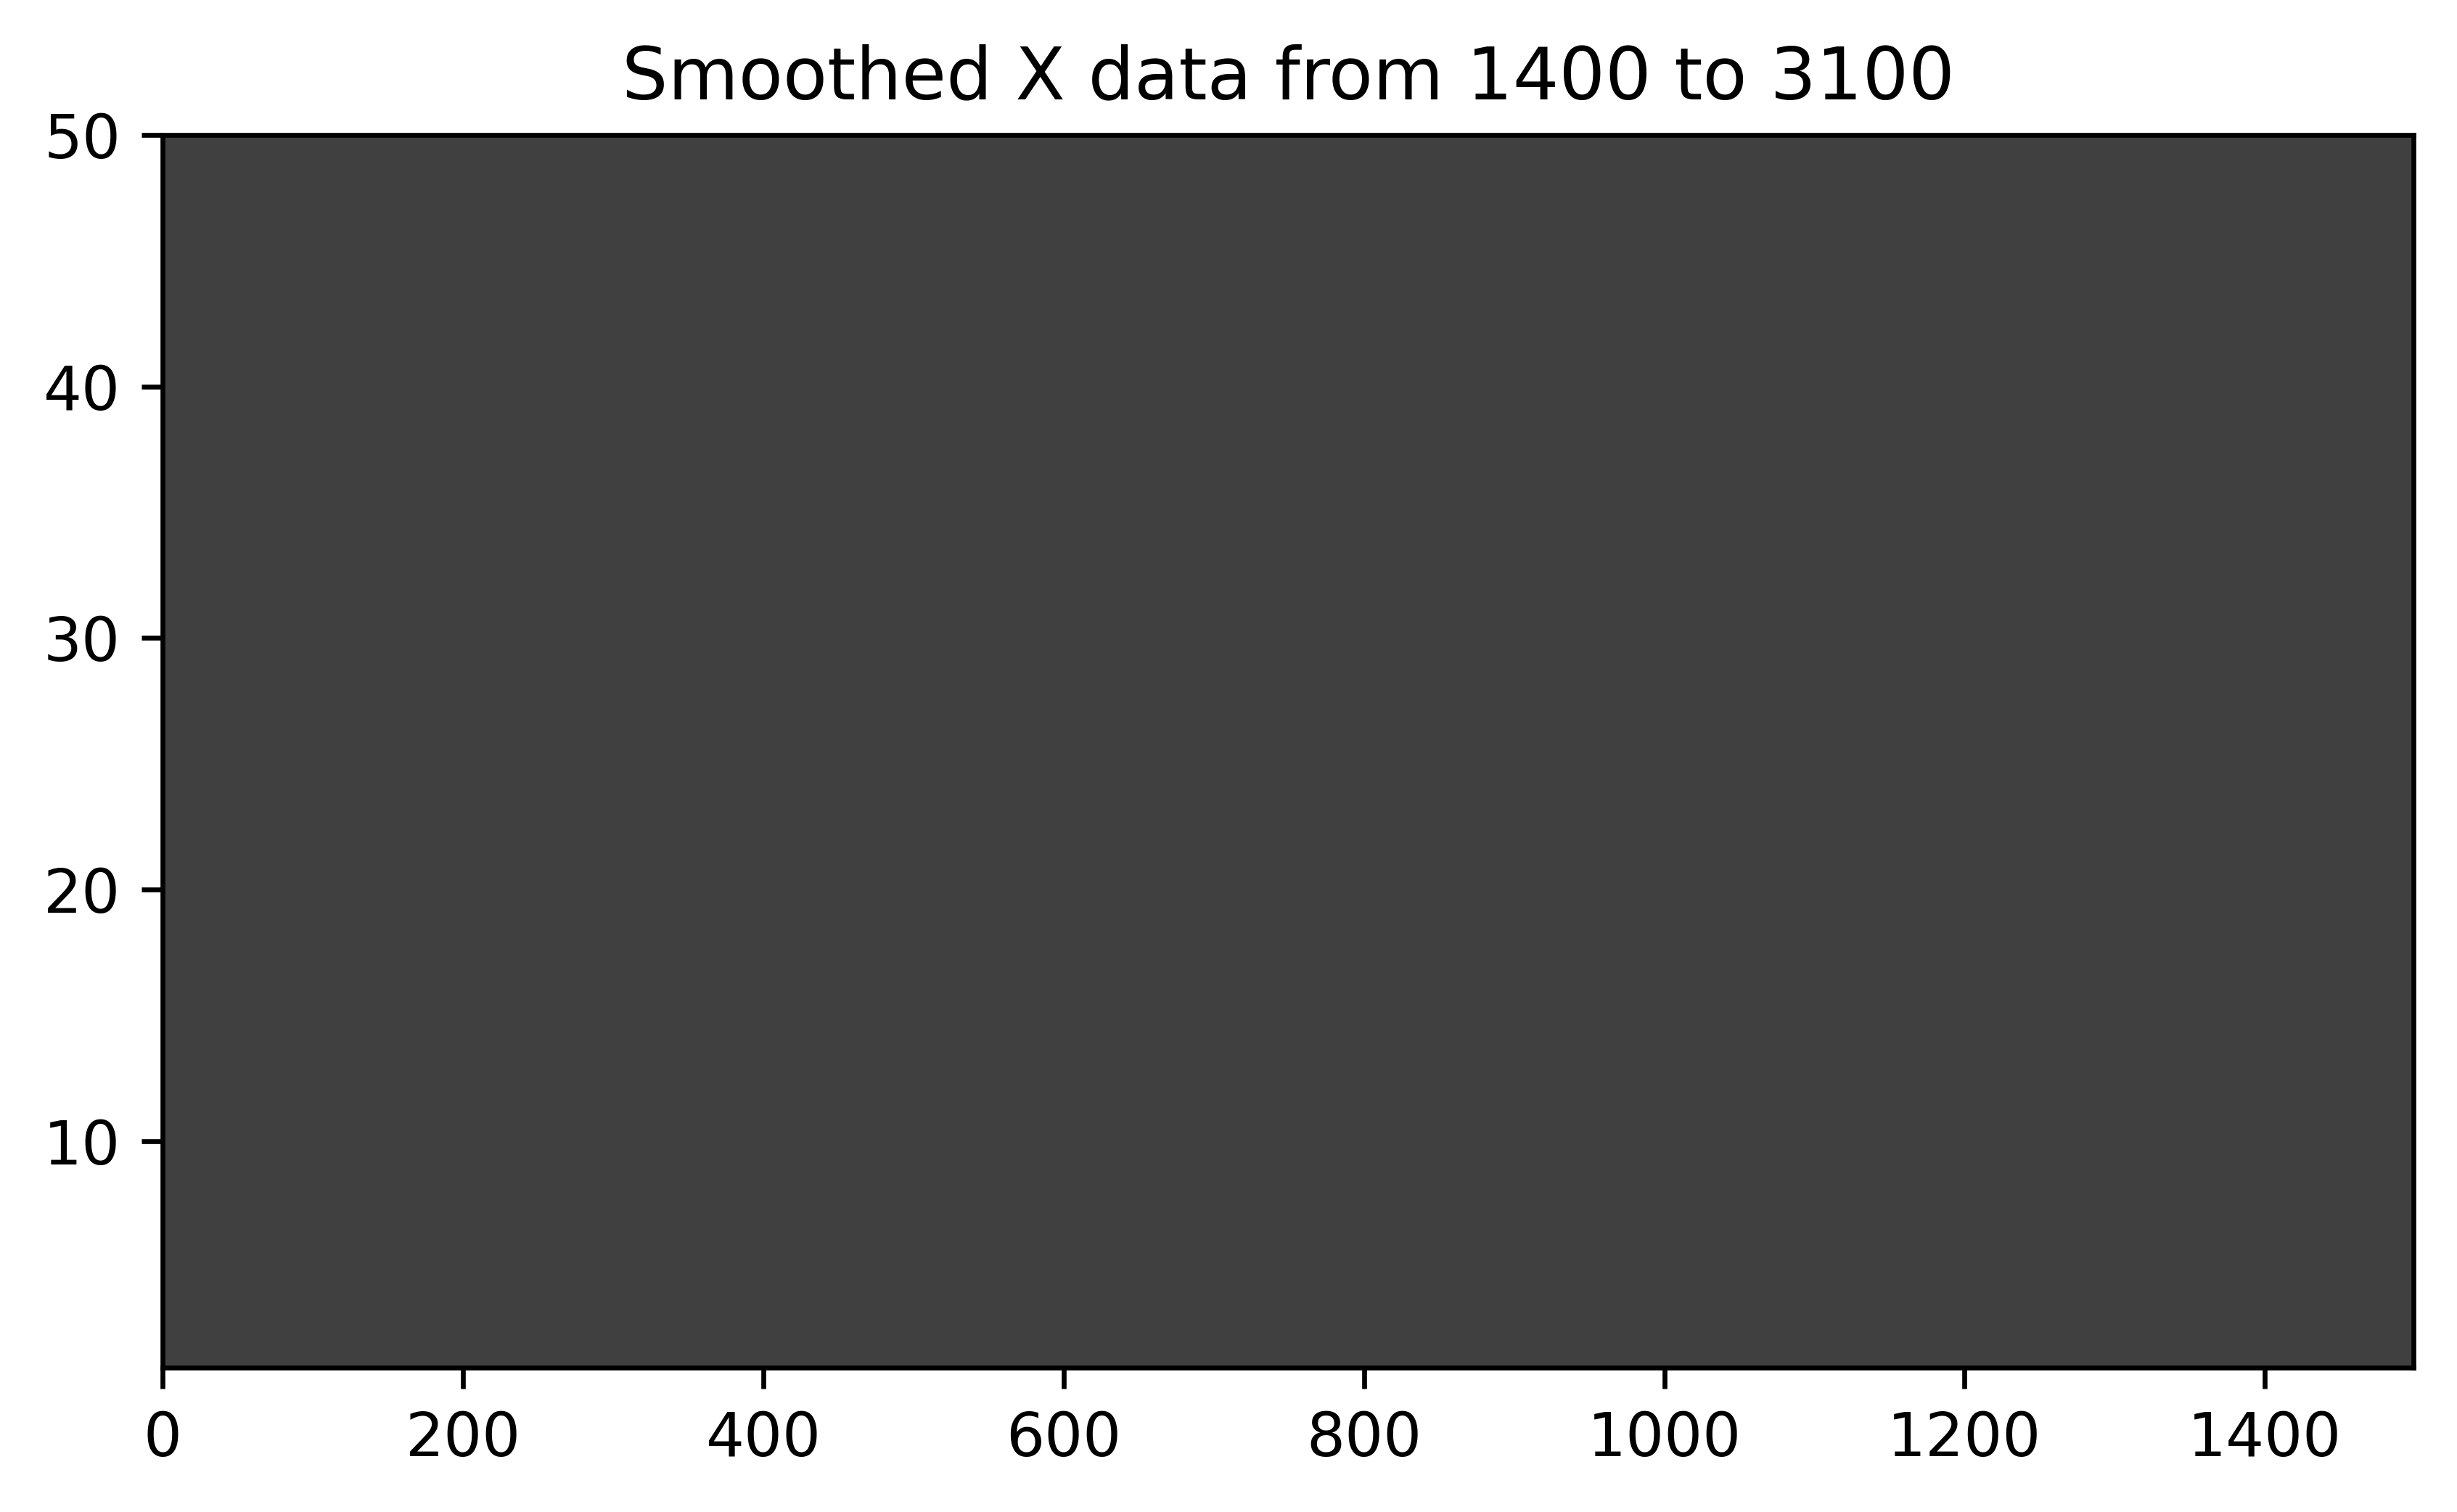

In [14]:
PlotFingerPrint(FpScatX,'a','Smoothed X data from '+str(start)+' to '+str(end),id,scales,slices,trim)